# Libraries

In [109]:
import numpy as np
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from  sklearn.impute import KNNImputer

# Load Data

In [110]:
# polutan_1 = pd.read_csv('../Pollutants/2021 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
# polutan_2 = pd.read_csv('../Pollutants/2022 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
polutan_3 = pd.read_csv('../Pollutants/2023 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
# polutan_4 = pd.read_csv('../Pollutants/2024 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
polutan_4 = pd.read_csv('../Pollutants/2024 - Indeks Standar Pencemar Udara (ISPU) Jan-Dec.csv', sep=';', decimal='.')

cuaca_kemayoran = pd.read_csv('../Meteorological Kemayoran/kemayoran 2021 - 2024.csv', sep=';', decimal='.')
cuaca_tanjung_priok = pd.read_csv('../Meteorological Tanjung Priok/tanjung priok 2021-2024.csv', sep=';', decimal='.')

# DKI 1: Bundaran HI (Jakarta Pusat)
# DKI 2: Kelapa Gading (Jakarta Utara)
# DKI 3: Jagakarsa (Jakarta Selatan)
# DKI 4: Lubang buaya (Jakarta Timur)
# DKI 5: Kebon Jeruk (Jakarta Barat)

# Preprocessing Data

Processing Data mencakup:
1. Data Polutan
    - menyamakan format data kosong ke None
    - Memasukkan data polutan per DKI ke axis kolom, agar tidak ada baris tanggal yang duplikat dan agar bisa digabungkan dengan data cuaca
2. Data Cuaca

beberapa yang preprocess manual:

2021
1. Rename value kolom stasiun
    - DKI1 (Bundaran HI) -> DKI1
    - DKI2 (Kelapa Gading) -> DKI2
    - DKI3 (Jagakarsa) -> DKI3
    - DKI4 (Lubang buaya) -> DKI4
    - DKI5 (Kebon Jeruk) -> DKI5

2022
1. lokasi_spku -> stasiun
2. typo pada periode 202202, tahun 2020 -> 2022

2023
1. Rename value kolom stasiun:
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5
    - DKI1 Bunderan HI -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4
2. Rename value parameter pencemar kritis
    - 2 -> PM25
    - 1 -> PM10
    - 5 -> O3
    - 3 -> SO2
3. typo pada periode 202212 -> 202312, 2022 -> 2023

2024
1. Rename value kolom stasiun:
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5
    - DKI1 Bunderan HI & DKI1 Bundaran Hotel Indonesia (HI) -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4

2. Rename value kolom stasiun (Updated on 12 Maret 2025):
    - DKI1 Bunderan HI & DKI1 Bundaran Hotel Indonesia (HI) -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5

In [111]:
example = np.cos(0), np.sin(0)
example

(np.float64(1.0), np.float64(0.0))

## Data Meteorologi

Arah Angin

- (1) C: Calm
- (2) N: North
- (3) NE: North East
- (4) E: East
- (5) SE: South East
- (6) S: South
- (7) SW: South West
- (8) W: West
- (9) NW: North West

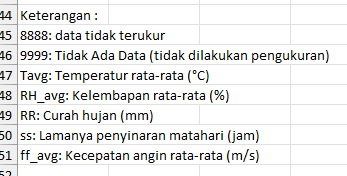

data di 23 oktober 2023 completely blank, use other imputation method

### Kemayoran

In [112]:
# cuaca_kemayoran = cuaca_kemayoran.drop(1440)
cuaca_kemayoran = cuaca_kemayoran.drop(columns=['lat', 'long', 'elevation'])

In [113]:
for i in range(len(cuaca_kemayoran['Tanggal'])):
  cuaca_kemayoran.loc[i, 'Tanggal'] = datetime.strptime(cuaca_kemayoran['Tanggal'][i], '%d-%m-%Y').date()

In [114]:
cuaca_kemayoran = cuaca_kemayoran[cuaca_kemayoran['Tanggal'] >= date(2023, 1, 1)]
cuaca_kemayoran = cuaca_kemayoran.reset_index(drop=True)
cuaca_kemayoran

Tanggal  Tavg  RH_avg    RR   ss  ff_avg DDD_CAR
0    2023-01-01  26,3    87.0  14,5    0     1.0      C 
1    2023-01-02  27,5    81.0  31,5  0,7     2.0      NW
2    2023-01-03  26,6    82.0   0,5    0     1.0      C 
3    2023-01-04  26,4    86.0   2,4  NaN     1.0      C 
4    2023-01-05  27,4    83.0  35,3  NaN     2.0      C 
..          ...   ...     ...   ...  ...     ...     ...
726  2024-12-27  29,2    78.0     -  1,2     2.0       C
727  2024-12-28    30    70.0     -  3,8     2.0       C
728  2024-12-29  29,7    73.0     -    3     1.0       C
729  2024-12-30  28,4    76.0     1  1,8     2.0      SW
730  2024-12-31  28,4    76.0     2  2,4     2.0       W

[731 rows x 7 columns]

In [115]:
cuaca_kemayoran[cuaca_kemayoran['Tanggal'] <= date(2024, 10, 31)]

Tanggal  Tavg  RH_avg    RR   ss  ff_avg DDD_CAR
0    2023-01-01  26,3    87.0  14,5    0     1.0      C 
1    2023-01-02  27,5    81.0  31,5  0,7     2.0      NW
2    2023-01-03  26,6    82.0   0,5    0     1.0      C 
3    2023-01-04  26,4    86.0   2,4  NaN     1.0      C 
4    2023-01-05  27,4    83.0  35,3  NaN     2.0      C 
..          ...   ...     ...   ...  ...     ...     ...
665  2024-10-27  30,1    71.0     0    8     2.0       C
666  2024-10-28  30,2    67.0     0    8     1.0       C
667  2024-10-29  30,8    69.0     0  0,6     1.0       C
668  2024-10-30  30,9    65.0     0  6,5     1.0       C
669  2024-10-31  30,4    70.0     0  6,5     1.0       C

[670 rows x 7 columns]

In [116]:
cuaca_kemayoran[['Tavg', 'RR', 'ss']] = cuaca_kemayoran[['Tavg', 'RR', 'ss']].apply(lambda x: x.str.replace(',','.'))

In [117]:
cuaca_kemayoran[['RR', 'ss']] = cuaca_kemayoran[['RR', 'ss']].replace('-', np.nan)
cuaca_kemayoran[['Tavg', 'RR', 'ss']] = cuaca_kemayoran[['Tavg', 'RR', 'ss']].astype(float)

In [118]:
cuaca_kemayoran['DDD_CAR'].unique()

array(['C ', 'NW', 'W ', 'S ', 'E ', nan, 'SW', 'C', 'E', 'N', 'W'],
      dtype=object)

In [119]:
cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].str.strip()
cuaca_kemayoran['DDD_CAR'].unique()

array(['C', 'NW', 'W', 'S', 'E', nan, 'SW', 'N'], dtype=object)

In [120]:
# manual label encoding
cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].replace({
  'C': 1,
  'N': 2,
  'NE': 3,
  'E': 4,
  'SE': 5,
  'S': 6,
  'SW': 7,
  'W': 8,
  'NW': 9
})

C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_10192\1221351845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].replace({


In [121]:
cuaca_kemayoran_processed = cuaca_kemayoran.copy()

In [122]:
cuaca_kemayoran_processed

Tanggal  Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
0    2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
1    2023-01-02  27.5    81.0  31.5  0.7     2.0      9.0
2    2023-01-03  26.6    82.0   0.5  0.0     1.0      1.0
3    2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
4    2023-01-05  27.4    83.0  35.3  NaN     2.0      1.0
..          ...   ...     ...   ...  ...     ...      ...
726  2024-12-27  29.2    78.0   NaN  1.2     2.0      1.0
727  2024-12-28  30.0    70.0   NaN  3.8     2.0      1.0
728  2024-12-29  29.7    73.0   NaN  3.0     1.0      1.0
729  2024-12-30  28.4    76.0   1.0  1.8     2.0      7.0
730  2024-12-31  28.4    76.0   2.0  2.4     2.0      8.0

[731 rows x 7 columns]

#### Missing Values

In [123]:
pysqldf(""" select 
        count(*) 
        from cuaca_kemayoran
        where Tavg is null or Tavg = '9999' or Tavg = '8888'
        or RH_avg is null or RH_avg = '9999' or RH_avg = '8888'
        or RR is null or RR = '9999' or RR = '8888'
        or ss is null or ss = '9999' or ss = '8888'
        or ff_avg is null or ff_avg = '9999' or ff_avg = '8888'
""")

count(*)
0       200

In [124]:
pysqldf(""" select 
        *
        from cuaca_kemayoran
        where Tavg is null and
        RH_avg is null and
        RR is null and
        ss is null and
        ff_avg is null
""")

Tanggal  Tavg RH_avg    RR    ss ff_avg DDD_CAR
0  2023-10-23  None   None  None  None   None    None

In [125]:
cuaca_kemayoran_processed = cuaca_kemayoran_processed.replace([9999.0, 8888.0], np.nan)

total row: 1440

rows contain null: 434

30.14% data null

#### EDA Univariate

In [126]:
cuaca_kemayoran_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  731 non-null    object 
 1   Tavg     726 non-null    float64
 2   RH_avg   728 non-null    float64
 3   RR       538 non-null    float64
 4   ss       720 non-null    float64
 5   ff_avg   730 non-null    float64
 6   DDD_CAR  730 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [127]:
cuaca_kemayoran_processed = cuaca_kemayoran_processed.set_index('Tanggal')

In [128]:
cuaca_kemayoran_processed.describe()

Tavg      RH_avg          RR          ss      ff_avg     DDD_CAR
count  726.000000  728.000000  538.000000  720.000000  730.000000  730.000000
mean    29.013774   74.961538    7.099257    4.441667    1.157534    1.526027
std      1.086990    6.512597   16.013209    2.593012    0.572439    1.705315
min     24.800000   56.000000    0.000000    0.000000    0.000000    1.000000
25%     28.400000   71.000000    0.000000    2.400000    1.000000    1.000000
50%     29.100000   75.000000    0.000000    4.800000    1.000000    1.000000
75%     29.700000   79.000000    4.450000    6.700000    1.000000    1.000000
max     31.800000   94.000000  140.900000    9.900000    3.000000    9.000000

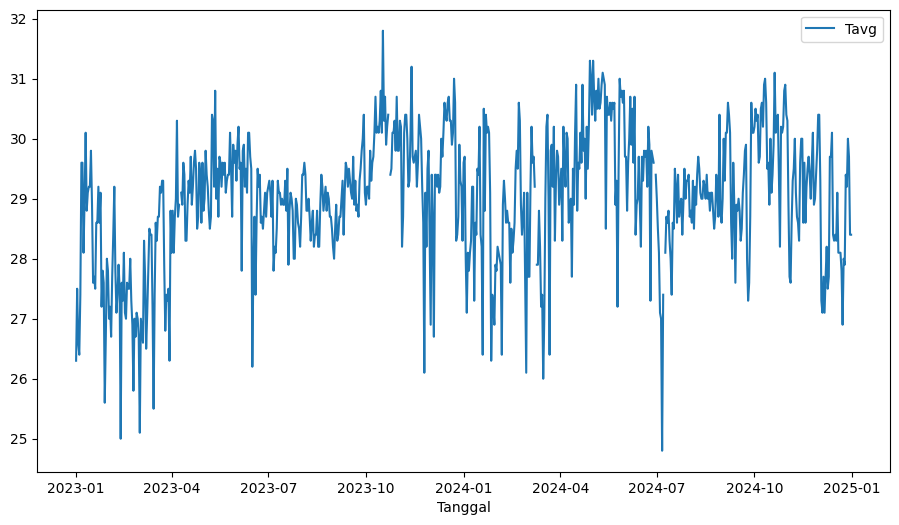

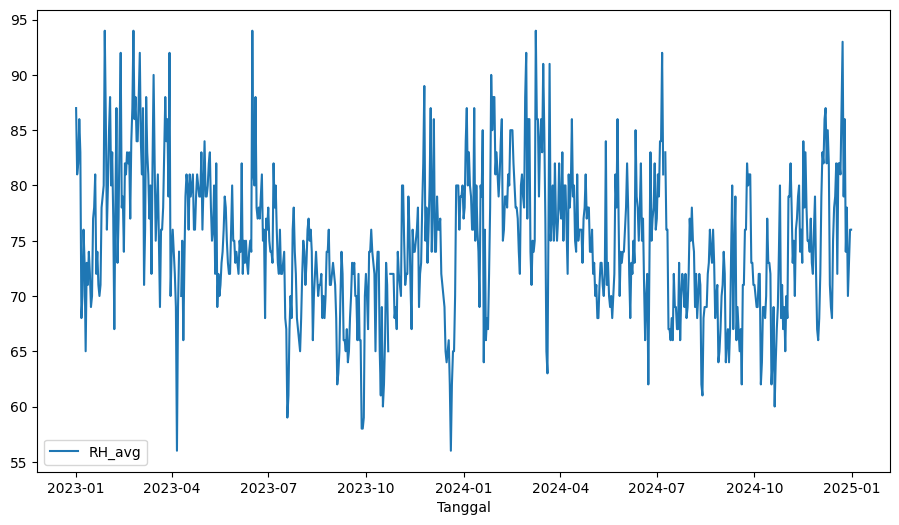

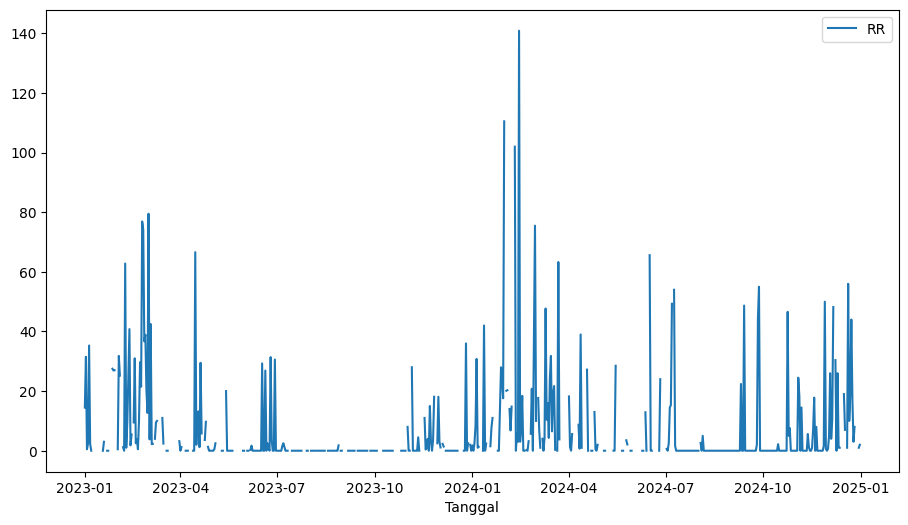

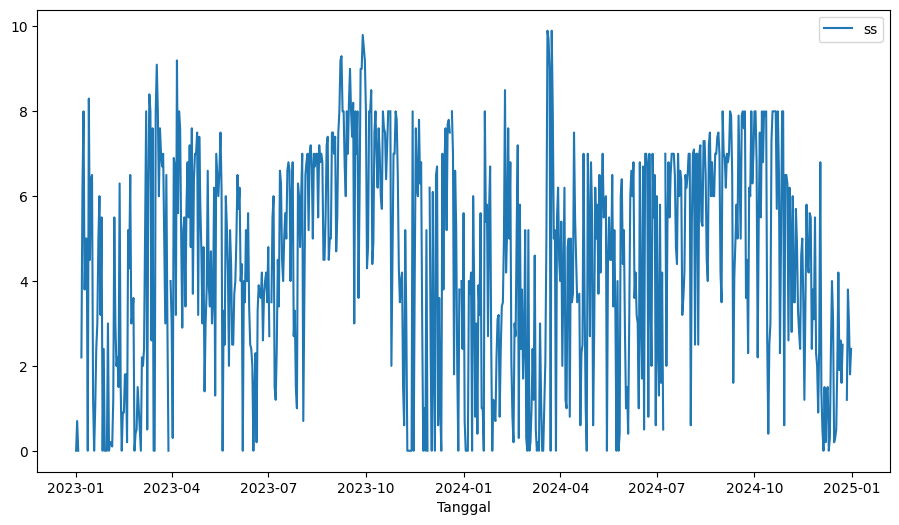

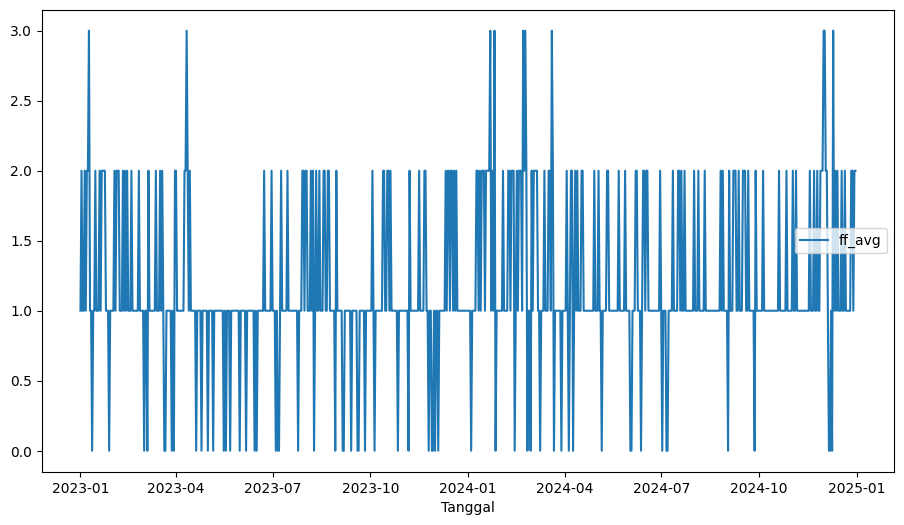

In [129]:
cuaca_kemayoran_processed.plot(y='Tavg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=25, ymax=32, colors='red')

cuaca_kemayoran_processed.plot(y='RH_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=55, ymax=95, colors='red')

cuaca_kemayoran_processed.plot(y='RR', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=200, colors='red')

cuaca_kemayoran_processed.plot(y='ss', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=10, colors='red')

cuaca_kemayoran_processed.plot(y='ff_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')
plt.show()

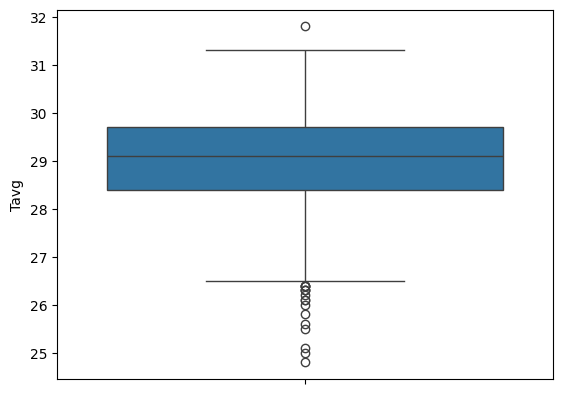

In [130]:
sns.boxplot(y=cuaca_kemayoran_processed['Tavg'])
plt.show()

Text(0, 0.5, 'counts')

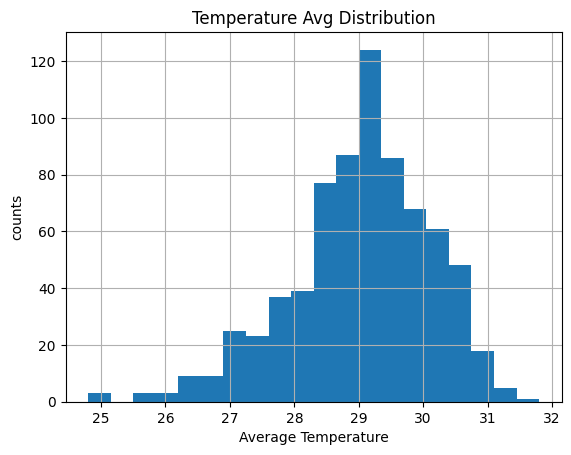

In [131]:
cuaca_kemayoran_processed['Tavg'].hist(bins = 20)
plt.title('Temperature Avg Distribution')
plt.xlabel('Average Temperature')
plt.ylabel('counts')

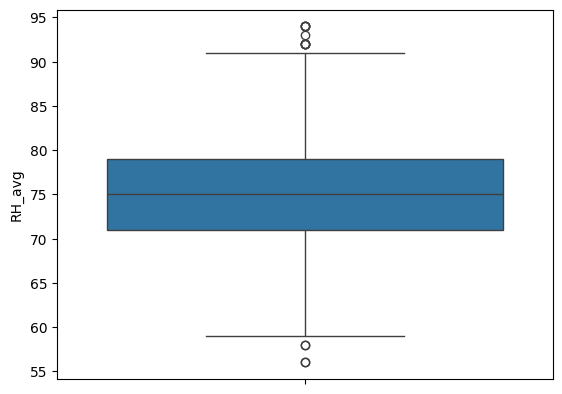

In [132]:
sns.boxplot(y=cuaca_kemayoran_processed['RH_avg'])
plt.show()

Text(0, 0.5, 'count')

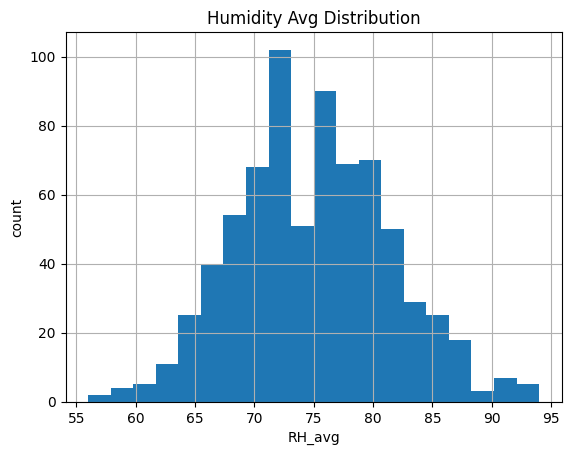

In [133]:
cuaca_kemayoran_processed['RH_avg'].hist(bins = 20)
plt.title('Humidity Avg Distribution')
plt.xlabel('RH_avg')
plt.ylabel('count')

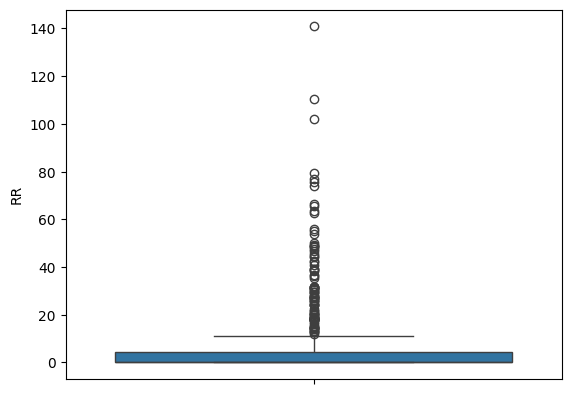

In [134]:
sns.boxplot(y=cuaca_kemayoran_processed['RR'])
plt.show()

Text(0, 0.5, 'count')

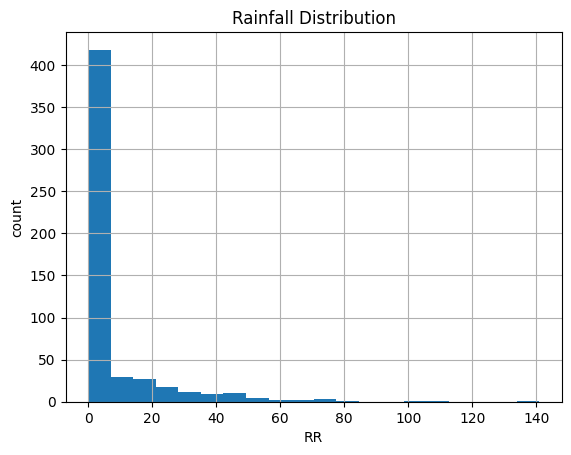

In [135]:
cuaca_kemayoran_processed['RR'].hist(bins = 20)
plt.title('Rainfall Distribution')
plt.xlabel('RR')
plt.ylabel('count')

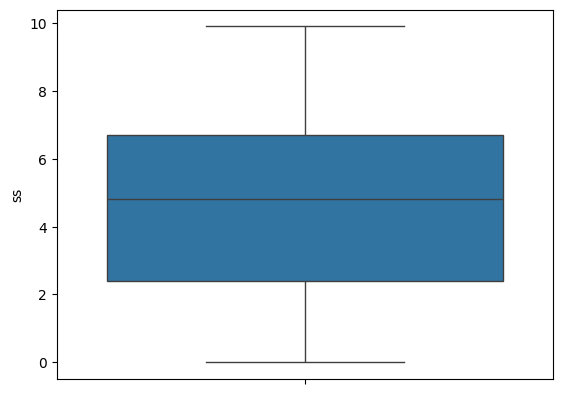

In [136]:
sns.boxplot(y=cuaca_kemayoran_processed['ss'])
plt.show()

Text(0, 0.5, 'count')

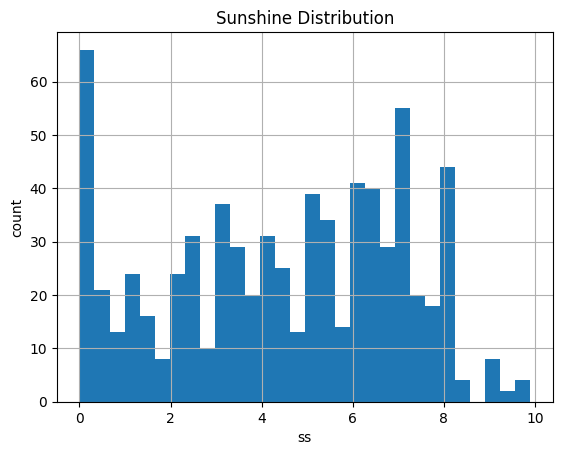

In [137]:
cuaca_kemayoran_processed['ss'].hist(bins = 30)
plt.title('Sunshine Distribution')
plt.xlabel('ss')
plt.ylabel('count')

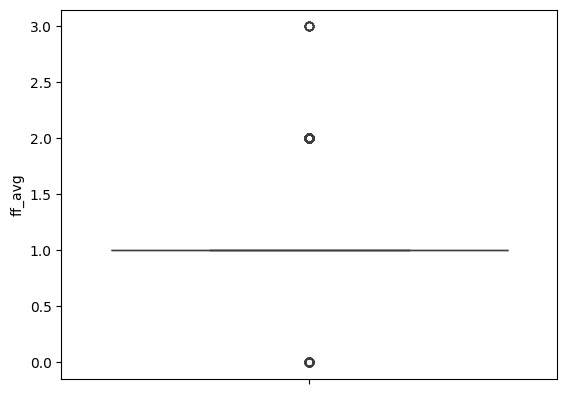

In [138]:
sns.boxplot(y=cuaca_kemayoran_processed['ff_avg'])
plt.show()

Text(0, 0.5, 'count')

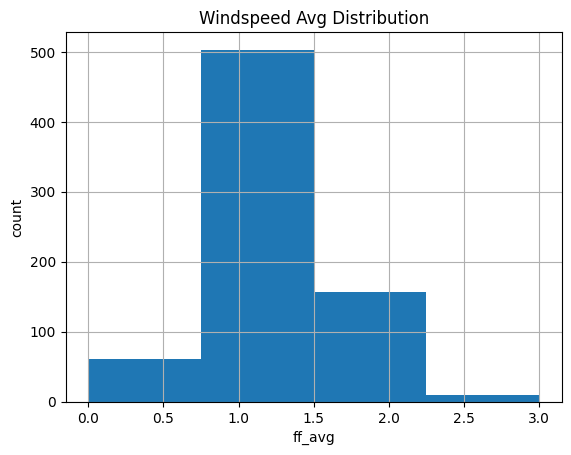

In [139]:
cuaca_kemayoran_processed['ff_avg'].hist(bins = 4)
plt.title('Windspeed Avg Distribution')
plt.xlabel('ff_avg')
plt.ylabel('count')

TRENDS
- tren Tavg semakin naik
- tren RH_avg cenderung semakin turun

DISTRIBUTIONS:
- Tavg & RH_avg mempunyai bentuk distribusi normal yang sedikit right skew

#### EDA Bivariate

In [140]:
list(cuaca_kemayoran_processed[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']].columns)

['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']

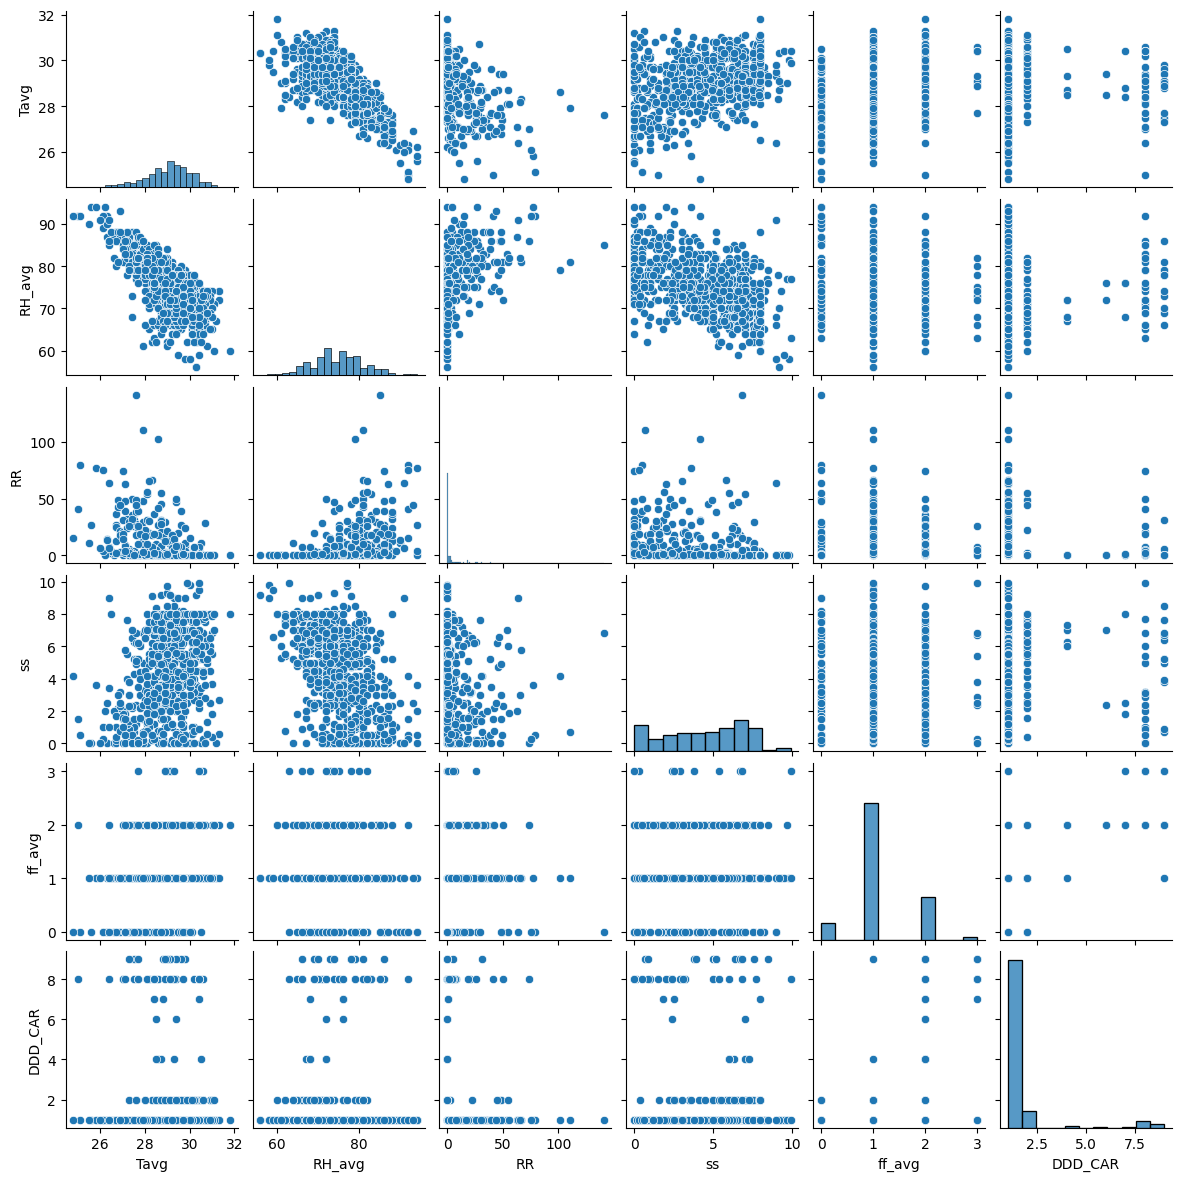

In [141]:
sns.pairplot(cuaca_kemayoran_processed, height=2)

Temperature
- LOWER Temperature - HIGHER Humidity
- LOWER Temperature - cenderung HIGHER Rainfall
- HIGHER Temperature - cendurung HIGHER Sunshine

Humidity
- HIGHER Humidity - cenderung HIGHER Rainfall
- HIGHER Humidity - cenderung LOWER sunshine

Else is hard to see the correlation

#### Impute Data

In [142]:
cuaca_kemayoran_processed

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
2023-01-02  27.5    81.0  31.5  0.7     2.0      9.0
2023-01-03  26.6    82.0   0.5  0.0     1.0      1.0
2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
2023-01-05  27.4    83.0  35.3  NaN     2.0      1.0
...          ...     ...   ...  ...     ...      ...
2024-12-27  29.2    78.0   NaN  1.2     2.0      1.0
2024-12-28  30.0    70.0   NaN  3.8     2.0      1.0
2024-12-29  29.7    73.0   NaN  3.0     1.0      1.0
2024-12-30  28.4    76.0   1.0  1.8     2.0      7.0
2024-12-31  28.4    76.0   2.0  2.4     2.0      8.0

[731 rows x 6 columns]

In [143]:
# KNN
imputer = KNNImputer()
imputed_cuaca_kemayoran = pd.concat(
  [
    pd.DataFrame({
      'Tanggal': cuaca_kemayoran['Tanggal']
    }),
    pd.DataFrame(imputer.fit_transform(cuaca_kemayoran_processed),columns = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR'])
  ], axis=1
)

In [144]:
imputed_cuaca_kemayoran

Tanggal  Tavg  RH_avg     RR    ss  ff_avg  DDD_CAR
0    2023-01-01  26.3    87.0  14.50  0.00     1.0      1.0
1    2023-01-02  27.5    81.0  31.50  0.70     2.0      9.0
2    2023-01-03  26.6    82.0   0.50  0.00     1.0      1.0
3    2023-01-04  26.4    86.0   2.40  2.12     1.0      1.0
4    2023-01-05  27.4    83.0  35.30  4.94     2.0      1.0
..          ...   ...     ...    ...   ...     ...      ...
726  2024-12-27  29.2    78.0   7.52  1.20     2.0      1.0
727  2024-12-28  30.0    70.0   0.64  3.80     2.0      1.0
728  2024-12-29  29.7    73.0   0.00  3.00     1.0      1.0
729  2024-12-30  28.4    76.0   1.00  1.80     2.0      7.0
730  2024-12-31  28.4    76.0   2.00  2.40     2.0      8.0

[731 rows x 7 columns]

In [145]:
imputed_cuaca_kemayoran[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']] = imputed_cuaca_kemayoran[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']].round(1)
imputed_cuaca_kemayoran[['RH_avg', 'DDD_CAR']] = imputed_cuaca_kemayoran[['RH_avg', 'DDD_CAR']].round(0)

In [146]:
# Interpolation in 23 October 2023
pysqldf("""select * from imputed_cuaca_kemayoran where Tanggal in ('2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26')""")

Tanggal  Tavg  RH_avg   RR   ss  ff_avg  DDD_CAR
0  2023-10-20  29.9    73.0  6.5  6.4     2.0      1.0
1  2023-10-21  30.2    71.0  0.0  7.2     1.0      1.0
2  2023-10-22  30.4    65.0  0.0  8.0     1.0      1.0
3  2023-10-23  29.0    75.0  7.1  4.4     1.2      2.0
4  2023-10-24  29.4    72.0  0.0  8.0     1.0      1.0
5  2023-10-25  29.5    72.0  0.4  2.0     1.0      1.0
6  2023-10-26  30.1    72.0  0.0  4.4     1.0      1.0

In [147]:
# Linear Interpolation
imputed_cuaca_kemayoran.loc[imputed_cuaca_kemayoran['Tanggal'] == datetime.strptime('23-10-2023', '%d-%m-%Y').date(), ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']] = np.nan
imputed_cuaca_kemayoran[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']] = imputed_cuaca_kemayoran[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']].interpolate(method ='linear', limit_direction ='forward')

In [148]:
# Interpolation in 23 October 2023
pysqldf("""select * from imputed_cuaca_kemayoran where Tanggal in ('2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26')""")

Tanggal  Tavg  RH_avg   RR   ss  ff_avg  DDD_CAR
0  2023-10-20  29.9    73.0  6.5  6.4     2.0      1.0
1  2023-10-21  30.2    71.0  0.0  7.2     1.0      1.0
2  2023-10-22  30.4    65.0  0.0  8.0     1.0      1.0
3  2023-10-23  29.9    68.5  0.0  8.0     1.0      1.0
4  2023-10-24  29.4    72.0  0.0  8.0     1.0      1.0
5  2023-10-25  29.5    72.0  0.4  2.0     1.0      1.0
6  2023-10-26  30.1    72.0  0.0  4.4     1.0      1.0

In [149]:
# imputed_cuaca_kemayoran = imputed_cuaca_kemayoran.set_index(imputed_cuaca_kemayoran['Tanggal'])

#### EDA After Cleaning & Preprocess

In [150]:
imputed_cuaca_kemayoran.describe()

Tavg      RH_avg          RR          ss      ff_avg     DDD_CAR
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000
mean    29.010807   74.954172    6.537483    4.451984    1.157319    1.525308
std      1.089215    6.504131   14.366142    2.590828    0.572077    1.704258
min     24.800000   56.000000    0.000000    0.000000    0.000000    1.000000
25%     28.400000   71.000000    0.000000    2.400000    1.000000    1.000000
50%     29.100000   75.000000    0.200000    4.800000    1.000000    1.000000
75%     29.700000   79.000000    5.650000    6.700000    1.000000    1.000000
max     31.800000   94.000000  140.900000    9.900000    3.000000    9.000000

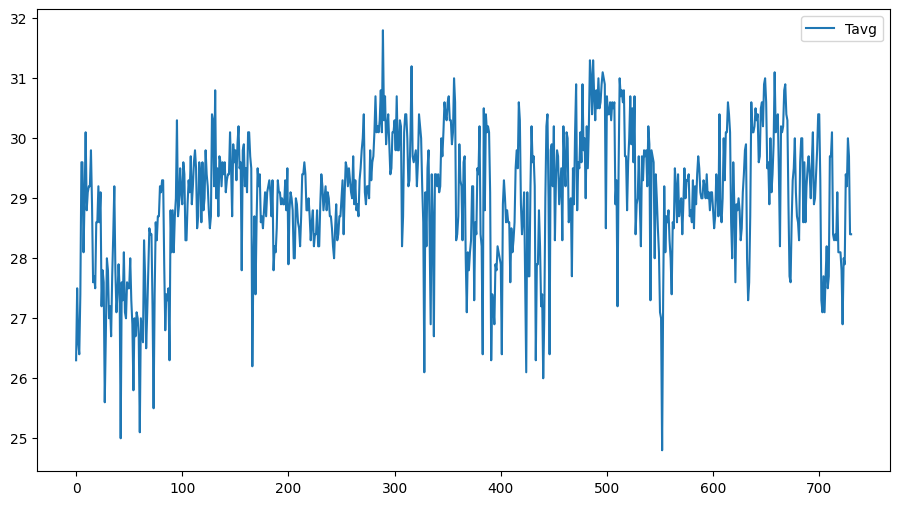

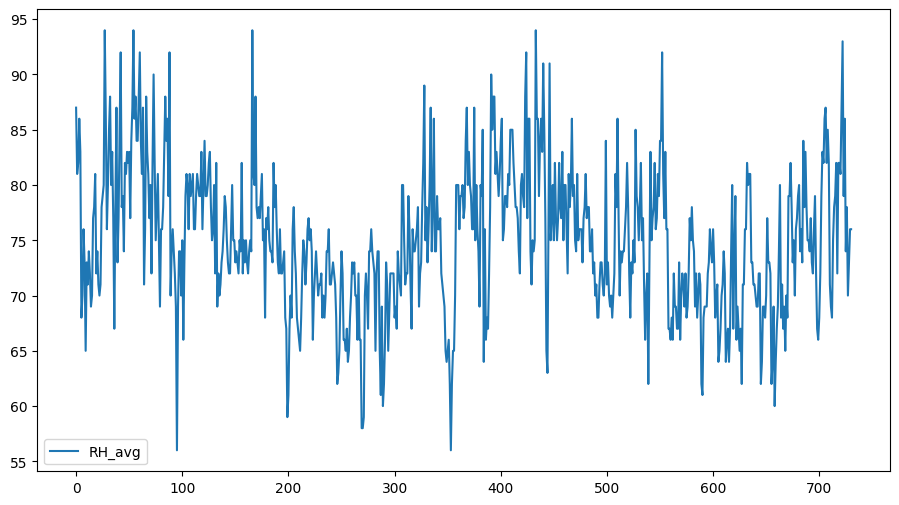

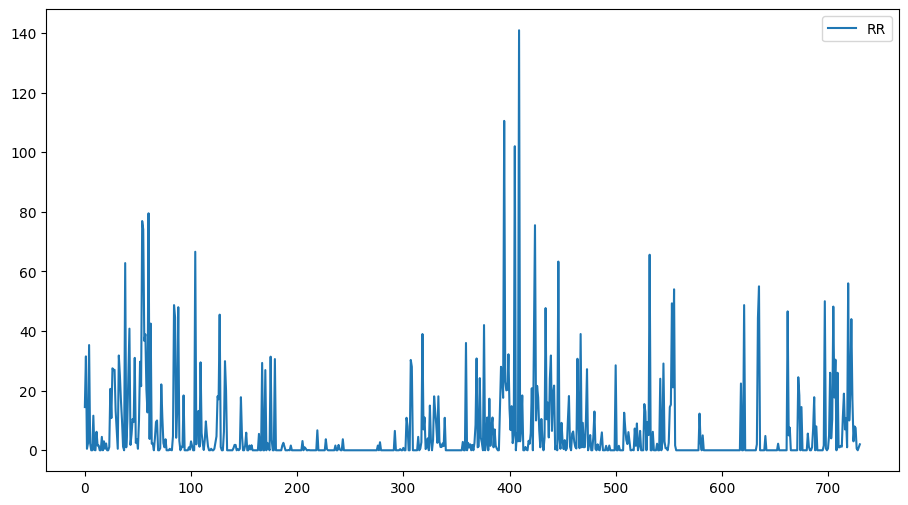

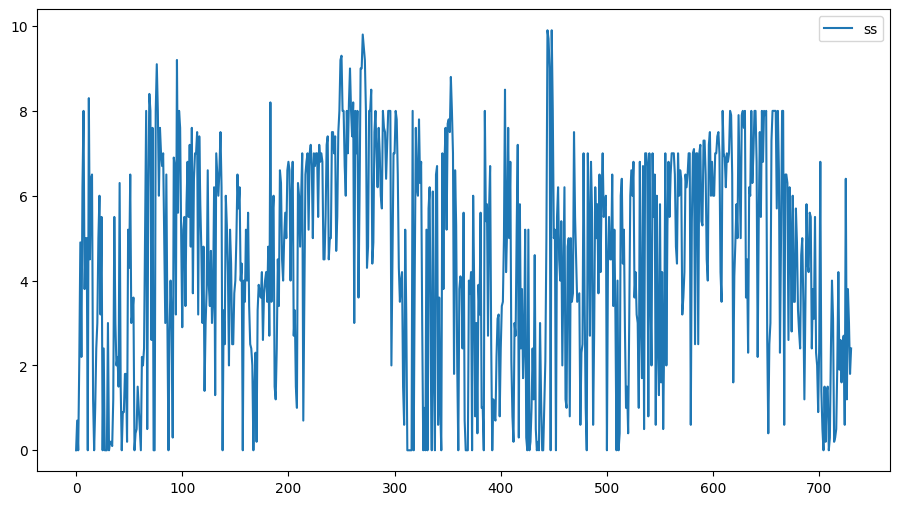

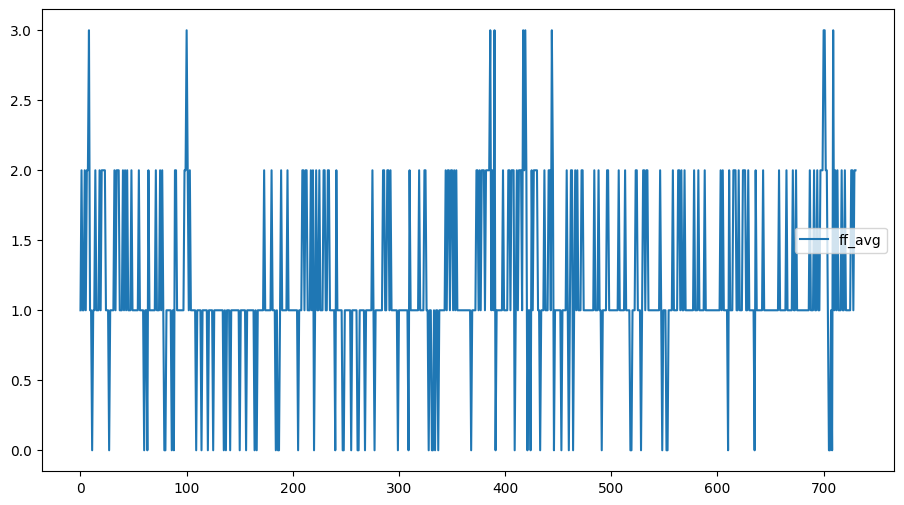

In [151]:
imputed_cuaca_kemayoran.plot(y='Tavg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=25, ymax=32, colors='red')

imputed_cuaca_kemayoran.plot(y='RH_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=55, ymax=95, colors='red')

imputed_cuaca_kemayoran.plot(y='RR', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=200, colors='red')

imputed_cuaca_kemayoran.plot(y='ss', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=10, colors='red')

imputed_cuaca_kemayoran.plot(y='ff_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')
plt.show()

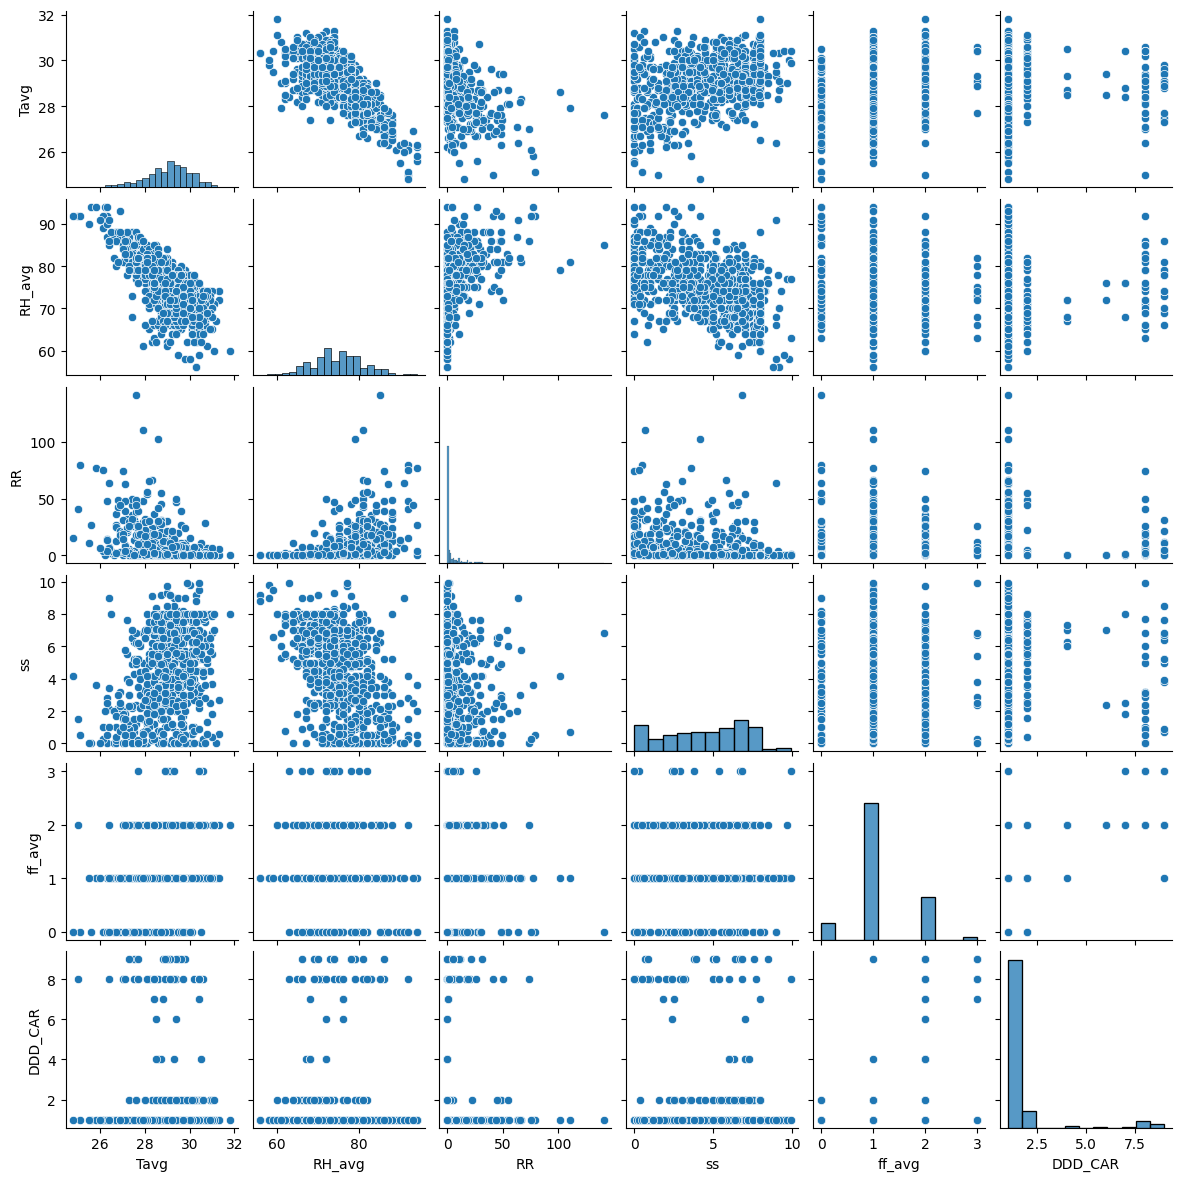

In [152]:
sns.pairplot(imputed_cuaca_kemayoran, height=2)

Rainfall menjadi kolom dengan jumlah imputasi paling banyak (300) data, namun tetap tidak terlihat perubahan yang berarti

### Summary EDA Data Cuaca

In [153]:
pysqldf(""" 
        select 
        'Kemayoran' as Stasiun,
        count(*) 
        from cuaca_kemayoran
        where Tavg is null or Tavg = '9999' or Tavg = '8888'
        or RH_avg is null or RH_avg = '9999' or RH_avg = '8888'
        or RR is null or RR = '9999' or RR = '8888'
        or ss is null or ss = '9999' or ss = '8888'
        or ff_avg is null or ff_avg = '9999' or ff_avg = '8888'
""")

Stasiun  count(*)
0  Kemayoran       200

**TRENDS**

*Kemayoran*:
- Tavg
    - memiliki trend menaik dari awal ke akhir 2023, lalu 2024 tidak ada tren
    - secara keseluruhan terdapat musiman sekitar 5-6 bulan sekali dari 2023-2024
- RH_avg
    - tidak ada trend
    - terdapat musiman yang terjadi sekitar 1 tahun sekali. RH akan tinggi pada awal dan akhir tahun, lalu menurun pada pertengahan tahun
- RR
    - tidak ada trend
    - seasonality: curah hujan yang menaik saat menjelang akhir tahun dan baru menurun saat menjelang pertengahan tahun

    -> ini mengikuti pola musim hujan dan kemarau tahunan indonesia
- SS
    - tidak ada tren
    - sulit untuk melihat seasonality, namun cenderung intensitas matahari lebih tinggi di bulan 10
- ff_avg
    - tidak ada tren
    - rata-rata ff_avg 1-2 m/s

*Tanjung Priok*:
- Tavg semakin naik
- RH_avg no trend

**DISTRIBUTIONS**

*Kemayoran*:
- Tavg: mempunyai bentuk distribusi normal yang right skew
- RH_avg mempunyai bentuk distribusi normal yang hampir sempurna
- RR: sangat left skew, artinya curah hujan lebih sering rendah
- ss: tidak dapat ditentukan
- ff_avg: dominan dengan kecepatan 1

*Tanjung Priok*:
- Tavg menyerupai normal distribution namun lebih right skew dari Kemayoran
- RH_avg hampir menyerupai normal distribution
- sunshine lebih memiliki bentuk namun tetap tidak menyerupai normal distribution

**CORRELATIONS**

*Kemayoran*
1. Temperature
    - HIGHER Humidity - LOWER Temperature
    - HIGHER Rainfall - cenderung LOWER Temperature
    - HIGHER Sunshine - cendurung HIGHER Temperature
2. Humidity
    - HIGHER Rainfall - cenderung HIGHER Humidity
    - LOWER sunshine - cenderung HIGHER Humidity

*Tanjung Priok*
1. Temperature
    - LOWER Temperature - HIGHER Humidity
    - no trend in Temperature & Rainfall
    - no trend in Temperature & Sunshine
2. Humidity
    - HIGHER Humidity - cenderung HIGHER Rainfall
    - ada sedikir kecenderungan LOWER RH_avg membuat HIGHER Sunshine


**Missing Value Summary (Kemayoran & Tanjung Priok)**

**Kemayoran**
- total row: 1440
- rows contain null: 434
- 30.14% data null

List of Missing Values:
  - Tavg: 8888, blank
  - RH_avg: blank
  - RR: 8888, blank
  - ss: blank
  - ff_avg: blank
  - ddd_car: blank

**Tanjung Priok**
- total row: 1440
- rows contain null: 305
- 21.18% data null

List of Missing Values:
- Tavg: blank
- RH_avg: blank
- RR: 8888, blank
- ss: blank
- ff_avg: blank
- ddd_car: blank 

After Cleaning & Preprocessing

Tanjung Priok: Rainfall menjadi kolom dengan jumlah imputasi paling banyak (300) data, namun tetap tidak terlihat perubahan yang berarti

### Menggabung Stasiun Kemayoran & Tanjung Priok

In [154]:
imputed_cuaca_kemayoran = imputed_cuaca_kemayoran.rename(columns={
  'Tavg': 'Tavg_km',
  'RH_avg': 'RH_avg_km',
  'RR': 'RR_km',
  'ss': 'ss_km',
  'ff_avg': 'ff_avg_km',
  'DDD_CAR': 'DDD_CAR_km'
})

imputed_cuaca_kemayoran = imputed_cuaca_kemayoran.set_index('Tanggal')
imputed_cuaca_kemayoran

Tavg_km  RH_avg_km  RR_km  ss_km  ff_avg_km  DDD_CAR_km
Tanggal                                                            
2023-01-01     26.3       87.0   14.5    0.0        1.0         1.0
2023-01-02     27.5       81.0   31.5    0.7        2.0         9.0
2023-01-03     26.6       82.0    0.5    0.0        1.0         1.0
2023-01-04     26.4       86.0    2.4    2.1        1.0         1.0
2023-01-05     27.4       83.0   35.3    4.9        2.0         1.0
...             ...        ...    ...    ...        ...         ...
2024-12-27     29.2       78.0    7.5    1.2        2.0         1.0
2024-12-28     30.0       70.0    0.6    3.8        2.0         1.0
2024-12-29     29.7       73.0    0.0    3.0        1.0         1.0
2024-12-30     28.4       76.0    1.0    1.8        2.0         7.0
2024-12-31     28.4       76.0    2.0    2.4        2.0         8.0

[731 rows x 6 columns]

In [155]:
# imputed_cuaca_tanjung_priok = imputed_cuaca_tanjung_priok.rename(columns={
#   'Tavg': 'Tavg_tp',
#   'RH_avg': 'RH_avg_tp',
#   'RR': 'RR_tp',
#   'ss': 'ss_tp',
#   'ff_avg': 'ff_avg_tp',
#   'DDD_CAR': 'DDD_CAR_tp'
# })
# imputed_cuaca_tanjung_priok = imputed_cuaca_tanjung_priok.set_index('Tanggal')
# imputed_cuaca_tanjung_priok

In [156]:
# data_meteorologi = imputed_cuaca_kemayoran.join(imputed_cuaca_tanjung_priok)
data_meteorologi = imputed_cuaca_kemayoran
data_meteorologi

Tavg_km  RH_avg_km  RR_km  ss_km  ff_avg_km  DDD_CAR_km
Tanggal                                                            
2023-01-01     26.3       87.0   14.5    0.0        1.0         1.0
2023-01-02     27.5       81.0   31.5    0.7        2.0         9.0
2023-01-03     26.6       82.0    0.5    0.0        1.0         1.0
2023-01-04     26.4       86.0    2.4    2.1        1.0         1.0
2023-01-05     27.4       83.0   35.3    4.9        2.0         1.0
...             ...        ...    ...    ...        ...         ...
2024-12-27     29.2       78.0    7.5    1.2        2.0         1.0
2024-12-28     30.0       70.0    0.6    3.8        2.0         1.0
2024-12-29     29.7       73.0    0.0    3.0        1.0         1.0
2024-12-30     28.4       76.0    1.0    1.8        2.0         7.0
2024-12-31     28.4       76.0    2.0    2.4        2.0         8.0

[731 rows x 6 columns]

## Data Polutan

### Penyamaan Kolom

#### Polutan 1 (tahun 2021)

In [157]:
# polutan_1 = polutan_1.rename(columns={'categori': 'kategori'})

#### Polutan 2 (tahun 2022)

In [158]:
# polutan_2 = polutan_2.rename(columns={
#   'pm_duakomalima': 'pm25',
#   'categori': 'kategori'
# })

#### Polutan 3 (tahun 2023)

In [159]:
polutan_3 = polutan_3.rename(columns={
  'pm_sepuluh': 'pm10',
  'pm_duakomalima': 'pm25',
  'sulfur_dioksida': 'so2',
  'karbon_monoksida': 'co',
  'ozon': 'o3',
  'nitrogen_dioksida': 'no2'
})

In [160]:
polutan_3

periode_data     tanggal stasiun pm10 pm25 so2  co  o3 no2 max critical  \
0           202301  01/01/2023    DKI1   44   55  47  10  24   9  55     PM25   
1           202301  01/01/2023    DKI2   44   61  56  16  20  19  61     PM25   
2           202301  01/01/2023    DKI3   26   43  51   5  16   2  51      SO2   
3           202301  01/01/2023    DKI4   23   57   -   -   -   -  57     PM25   
4           202301  01/01/2023    DKI5   30    -  21  13  14   1  52     PM10   
...            ...         ...     ...  ...  ...  ..  ..  ..  ..  ..      ...   
1820        202312  31/12/2023    DKI1   54   68  49  11  19  12  68     PM25   
1821        202312  31/12/2023    DKI2   47   58  56  21  23  24  58     PM25   
1822        202312  31/12/2023    DKI3   48   49   -  24  14   -  49     PM25   
1823        202312  31/12/2023    DKI4   49   73   -   -   -   -  73     PM25   
1824        202312  31/12/2023    DKI5   50    -  23  21  13   -  50     PM10   

     kategori  
0      SEDANG  
1      SEDANG  
2      SEDANG  
3      SEDANG  
4      SEDANG  
...       ...  
1820   SEDANG  
1821   SEDANG  
1822     BAIK  
1823   SEDANG  
1824     BAIK  

[1825 rows x 12 columns]

#### Polutan 4 (tahun 2024)

In [161]:
polutan_4 = polutan_4.rename(columns={
  'pm_sepuluh': 'pm10',
  'pm_duakomalima': 'pm25',
  'sulfur_dioksida': 'so2',
  'karbon_monoksida': 'co',
  'ozon': 'o3',
  'nitrogen_dioksida': 'no2'
})

In [162]:
polutan_4['tanggal_2'] = polutan_4['tanggal'].astype('str') + '/' + polutan_4['bulan'].astype('str') + '/' + '2024'

In [163]:
polutan_4.insert(1, 'tanggal_3', polutan_4['tanggal_2'])

In [164]:
polutan_4.pop('bulan')
polutan_4.pop('tanggal')
polutan_4.pop('tanggal_2')

0        21/1/2024
1        22/1/2024
2        23/1/2024
3        24/1/2024
4        25/1/2024
           ...    
1825    27/12/2024
1826    28/12/2024
1827    29/12/2024
1828    30/12/2024
1829    31/12/2024
Name: tanggal_2, Length: 1830, dtype: object

In [165]:
polutan_4 = polutan_4.rename(columns=({'tanggal_3': 'tanggal'}))

In [166]:
polutan_4

periode_data     tanggal stasiun  pm10  pm25   so2   co    o3   no2  \
0           202401   21/1/2024    DKI3  51.0  65.0  45.0  9.0   8.0  79.0   
1           202401   22/1/2024    DKI3  27.0  34.0  45.0  5.0   8.0  56.0   
2           202401   23/1/2024    DKI3   NaN  52.0  46.0  6.0   9.0  51.0   
3           202401   24/1/2024    DKI3  46.0  65.0  46.0  8.0   9.0  38.0   
4           202401   25/1/2024    DKI3  37.0  55.0  47.0  7.0  11.0  28.0   
...            ...         ...     ...   ...   ...   ...  ...   ...   ...   
1825        202412  27/12/2024    DKI5   NaN  55.0  27.0  9.0  30.0  12.0   
1826        202412  28/12/2024    DKI5   NaN  40.0  26.0  6.0  30.0  12.0   
1827        202412  29/12/2024    DKI5   NaN  51.0  32.0  8.0  28.0  11.0   
1828        202412  30/12/2024    DKI5   NaN  34.0   9.0  5.0  38.0   8.0   
1829        202412  31/12/2024    DKI5   NaN  26.0   9.0  3.0  26.0   3.0   

       max critical kategori  
0     79.0      NaN   SEDANG  
1     56.0      NaN   SEDANG  
2     52.0     PM25   SEDANG  
3     65.0     PM25   SEDANG  
4     55.0     PM25   SEDANG  
...    ...      ...      ...  
1825  55.0     PM25   SEDANG  
1826  40.0     PM25     BAIK  
1827  51.0     PM25   SEDANG  
1828  38.0       O3     BAIK  
1829  26.0     PM25     BAIK  

[1830 rows x 12 columns]

### Penggabungan Data 2023-2024

In [167]:
merge_polutan = pd.concat([polutan_3, polutan_4], ignore_index=True,axis=0)

In [168]:
merge_polutan.pop('periode_data')
merge_polutan.pop('max')
merge_polutan.pop('critical')
merge_polutan.pop('kategori')

0       SEDANG
1       SEDANG
2       SEDANG
3       SEDANG
4       SEDANG
         ...  
3650    SEDANG
3651      BAIK
3652    SEDANG
3653      BAIK
3654      BAIK
Name: kategori, Length: 3655, dtype: object

In [204]:
merge_polutan

tanggal stasiun  pm10  pm25   so2    co    o3   no2
0    2023-01-01    DKI1  44.0  55.0  47.0  10.0  24.0   9.0
1    2023-01-01    DKI2  44.0  61.0  56.0  16.0  20.0  19.0
2    2023-01-01    DKI3  26.0  43.0  51.0   5.0  16.0   2.0
3    2023-01-01    DKI4  23.0  57.0   NaN   NaN   NaN   NaN
4    2023-01-01    DKI5  30.0   NaN  21.0  13.0  14.0   1.0
...         ...     ...   ...   ...   ...   ...   ...   ...
3650 2024-12-31    DKI1  29.0  11.0   6.0  13.0  10.0  18.0
3651 2024-12-31    DKI3  29.0  11.0   6.0  13.0  10.0  18.0
3652 2024-12-31    DKI4  27.0  15.0  21.0   6.0  18.0   8.0
3653 2024-12-31    DKI2  29.0  35.0  22.0  11.0  12.0  13.0
3654 2024-12-31    DKI5   NaN  26.0   9.0   3.0  26.0   3.0

[3655 rows x 8 columns]

### Data Understanding

- Check data after merged
- find the Non-NaN empty values
- formatting data

In [170]:
merge_polutan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  3655 non-null   object
 1   stasiun  3655 non-null   object
 2   pm10     3543 non-null   object
 3   pm25     3635 non-null   object
 4   so2      3646 non-null   object
 5   co       3643 non-null   object
 6   o3       3646 non-null   object
 7   no2      3629 non-null   object
dtypes: object(8)
memory usage: 228.6+ KB


In [171]:
merge_polutan.describe()

tanggal stasiun  pm10  pm25     so2    co    o3   no2
count         3655    3655  3543  3635  3646.0  3643  3646  3629
unique         731       5   170   252   121.0    94   152   139
top     31/12/2024    DKI1     -     -    54.0    10    21    16
freq             5     731   222   295   116.0   147    81    90

In [172]:
merge_polutan['tanggal'] = pd.to_datetime(merge_polutan['tanggal'], format = '%d/%m/%Y')

In [173]:
merge_polutan = merge_polutan.sort_values(by='tanggal', ignore_index=True)

#### PM10

In [174]:
# Checking Non-NaN empty values (unique values)
pm10_uv = pysqldf(""" select distinct pm10 from merge_polutan where pm10 not like '%.0' """)

pm10_uv[~pm10_uv['pm10'].astype(str).str.isnumeric()]

# THERE IS None TOO

pm10
25    -

#### PM2.5

In [175]:
# Checking Non-NaN empty values (unique values)

# pysqldf(""" select distinct pm25 from merge_polutan where pm25 like '%.%' order by pm25 """)['pm25'].values
pm25_uv = pysqldf(""" select distinct pm25 from merge_polutan where pm25 not like '%.0' order by pm25""") # not float
pm25_uv[~pm25_uv['pm25'].astype(str).str.isnumeric()]

# THERE IS None TOO

pm25
0    -

#### SO2

In [176]:
# Checking Non-NaN empty values (unique values)

# pysqldf(""" select distinct so2 from merge_polutan where so2 like '%.%' order by so2 """)['so2'].values
so2_uv = pysqldf(""" select distinct so2 from merge_polutan where so2 not like '%.0' order by so2""") # not float
so2_uv[~so2_uv['so2'].astype(str).str.isnumeric()]

# THERE IS None TOO

so2
0   -

#### CO

In [177]:
# Checking Non-NaN empty values (unique values)

# pysqldf(""" select distinct co from merge_polutan where co like '%.%' order by co """)['co'].values
co_uv = pysqldf(""" select distinct co from merge_polutan where co not like '%.0' order by co""") # not float
co_uv[~co_uv['co'].astype(str).str.isnumeric()]

# THERE IS None TOO

co
0    -
1  ---

#### O3

In [178]:
# Checking Non-NaN empty values (unique values)

# pysqldf(""" select distinct o3 from merge_polutan where o3 like '%.%' order by o3 """)['o3'].values
o3_uv = pysqldf(""" select distinct o3 from merge_polutan where o3 not like '%.0' order by o3""") # not float
o3_uv[~o3_uv['o3'].astype(str).str.isnumeric()]

# THERE IS None TOO

o3
0    -
1  ---

In [179]:
# Checking Non-NaN empty values (unique values)

# pysqldf(""" select distinct no2 from merge_polutan where no2 like '%.%' order by no2 """)['no2'].values
no2_uv = pysqldf(""" select distinct no2 from merge_polutan where no2 not like '%.0' order by no2""") # not float
no2_uv[~no2_uv['no2'].astype(str).str.isnumeric()]

# THERE IS None TOO

no2
0   -

### Check Missing Values Pada Penggabungan Data 2021-2024

1. pm10: '-', '---', blank
2. pm25: '-', '---', blank
3. so2: '-', '---', blank
4. co: '-', '---', blank
5. o3: '-', '---', blank
6. no2: '-', '---', blank


Missing Values Pada Penggabungan Data 2023-2024

1. pm10: '-', blank
2. pm25: '-', blank
3. so2: '-', blank
4. co: '-', '---', blank
5. o3: '-', '---', blank
6. no2: '-', blank


missing values akan diubah ke dalamn NaN

In [180]:
merge_polutan = merge_polutan.replace(['-', '---'], np.nan)

In [181]:
for col in ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']:
  merge_polutan[col] = merge_polutan[col].astype(float)

In [182]:
merge_polutan

tanggal stasiun  pm10  pm25   so2    co    o3   no2
0    2023-01-01    DKI1  44.0  55.0  47.0  10.0  24.0   9.0
1    2023-01-01    DKI2  44.0  61.0  56.0  16.0  20.0  19.0
2    2023-01-01    DKI3  26.0  43.0  51.0   5.0  16.0   2.0
3    2023-01-01    DKI4  23.0  57.0   NaN   NaN   NaN   NaN
4    2023-01-01    DKI5  30.0   NaN  21.0  13.0  14.0   1.0
...         ...     ...   ...   ...   ...   ...   ...   ...
3650 2024-12-31    DKI1  29.0  11.0   6.0  13.0  10.0  18.0
3651 2024-12-31    DKI3  29.0  11.0   6.0  13.0  10.0  18.0
3652 2024-12-31    DKI4  27.0  15.0  21.0   6.0  18.0   8.0
3653 2024-12-31    DKI2  29.0  35.0  22.0  11.0  12.0  13.0
3654 2024-12-31    DKI5   NaN  26.0   9.0   3.0  26.0   3.0

[3655 rows x 8 columns]

In [183]:
# data yang mengandung null values
null_merge_polutan = merge_polutan[merge_polutan.isnull().any(axis=1)]
null_merge_polutan

tanggal stasiun  pm10  pm25   so2    co    o3   no2
3    2023-01-01    DKI4  23.0  57.0   NaN   NaN   NaN   NaN
4    2023-01-01    DKI5  30.0   NaN  21.0  13.0  14.0   1.0
5    2023-01-02    DKI5  25.0   NaN  30.0  13.0  16.0   2.0
12   2023-01-03    DKI3  25.0  32.0  53.0   4.0  15.0   NaN
14   2023-01-03    DKI5  22.0   NaN  28.0  11.0  15.0   NaN
...         ...     ...   ...   ...   ...   ...   ...   ...
3630 2024-12-27    DKI5   NaN  55.0  27.0   9.0  30.0  12.0
3635 2024-12-28    DKI5   NaN  40.0  26.0   6.0  30.0  12.0
3641 2024-12-29    DKI5   NaN  51.0  32.0   8.0  28.0  11.0
3646 2024-12-30    DKI5   NaN  34.0   9.0   5.0  38.0   8.0
3654 2024-12-31    DKI5   NaN  26.0   9.0   3.0  26.0   3.0

[691 rows x 8 columns]

In [184]:
count_null_merge_polutan = pysqldf(
"""
  select 
    stasiun, 
    sum(case when pm10 is null then 1 else 0 end) as pm10,
    sum(case when pm25 is null then 1 else 0 end) as pm25,
    sum(case when so2 is null then 1 else 0 end) as so2,
    sum(case when co is null then 1 else 0 end) as co,
    sum(case when o3 is null then 1 else 0 end) as o3,
    sum(case when no2 is null then 1 else 0 end) as no2
  from null_merge_polutan
  group by stasiun
"""
)
count_null_merge_polutan

stasiun  pm10  pm25  so2  co  o3  no2
0    DKI1     4     7    9  17   5    4
1    DKI2    13     4   11   4   4   14
2    DKI3    17    15    6   7   7   24
3    DKI4   216    14   14  18  13   12
4    DKI5    84   275    8  10   9   38

<Axes: xlabel='stasiun'>

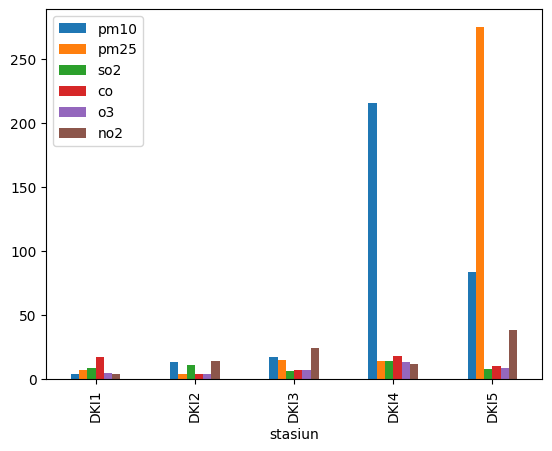

In [185]:
# see null count of every observed pollutant by each region
count_null_merge_polutan.plot(
  x='stasiun',
  kind='bar',
  stacked=False
)

**2023-2024, Missing Values Percentage: 17,88%**

3350 total rows

599 rows contain nulls

**dibawah ini adalah 2023-2024**

current total data: 5175

total rows with missing data: 906

17.55% baris data contains missing value

42 baris data Missing Completely At Random (MCAR)

**2023-2024, Missing Values Percentage: 18,91%**

3655 total rows

691 rows contain nulls

26 baris data Missing Completely At Random (MCAR)

In [186]:
# data polutan yang semua perhitungan kosong
null_rows = pysqldf(""" 
  select *
  from null_merge_polutan 
  where 
  pm10 is null and
  pm25 is null and
  so2 is null and
  co is null and
  o3 is null and
  no2 is null
""")
null_rows

tanggal stasiun  pm10  pm25   so2    co    o3   no2
0   2023-01-11 00:00:00.000000    DKI3  None  None  None  None  None  None
1   2023-01-16 00:00:00.000000    DKI4  None  None  None  None  None  None
2   2023-02-08 00:00:00.000000    DKI3  None  None  None  None  None  None
3   2023-03-22 00:00:00.000000    DKI1  None  None  None  None  None  None
4   2023-03-23 00:00:00.000000    DKI1  None  None  None  None  None  None
5   2023-03-24 00:00:00.000000    DKI1  None  None  None  None  None  None
6   2023-04-01 00:00:00.000000    DKI5  None  None  None  None  None  None
7   2023-04-02 00:00:00.000000    DKI5  None  None  None  None  None  None
8   2023-04-03 00:00:00.000000    DKI5  None  None  None  None  None  None
9   2023-04-06 00:00:00.000000    DKI5  None  None  None  None  None  None
10  2023-04-11 00:00:00.000000    DKI4  None  None  None  None  None  None
11  2023-05-09 00:00:00.000000    DKI2  None  None  None  None  None  None
12  2023-07-05 00:00:00.000000    DKI3  None  None  None  None  None  None
13  2023-09-06 00:00:00.000000    DKI5  None  None  None  None  None  None
14  2023-09-17 00:00:00.000000    DKI5  None  None  None  None  None  None
15  2023-09-30 00:00:00.000000    DKI1  None  None  None  None  None  None
16  2023-09-30 00:00:00.000000    DKI2  None  None  None  None  None  None
17  2023-09-30 00:00:00.000000    DKI3  None  None  None  None  None  None
18  2023-09-30 00:00:00.000000    DKI4  None  None  None  None  None  None
19  2023-09-30 00:00:00.000000    DKI5  None  None  None  None  None  None
20  2023-11-13 00:00:00.000000    DKI4  None  None  None  None  None  None
21  2024-02-19 00:00:00.000000    DKI2  None  None  None  None  None  None
22  2024-02-28 00:00:00.000000    DKI4  None  None  None  None  None  None
23  2024-03-22 00:00:00.000000    DKI4  None  None  None  None  None  None
24  2024-05-02 00:00:00.000000    DKI4  None  None  None  None  None  None
25  2024-09-02 00:00:00.000000    DKI4  None  None  None  None  None  None
26  2024-11-28 00:00:00.000000    DKI3  None  None  None  None  None  None

In [187]:
# melihat count baris kosong
null_row_plot = pysqldf(""" 
  select strftime('%Y', tanggal) as year,
    SUM(CASE WHEN stasiun = 'DKI1' THEN 1 ELSE 0 END) AS DKI1,
    SUM(CASE WHEN stasiun = 'DKI2' THEN 1 ELSE 0 END) AS DKI2,
    SUM(CASE WHEN stasiun = 'DKI3' THEN 1 ELSE 0 END) AS DKI3,
    SUM(CASE WHEN stasiun = 'DKI4' THEN 1 ELSE 0 END) AS DKI4,
    SUM(CASE WHEN stasiun = 'DKI5' THEN 1 ELSE 0 END) AS DKI5
  from null_merge_polutan 
  where 
  pm10 is null and
  pm25 is null and
  so2 is null and
  co is null and
  o3 is null and
  no2 is null
  group by strftime('%Y', tanggal)
  order by stasiun,
strftime('%Y', tanggal) asc
""")

null_row_plot

year  DKI1  DKI2  DKI3  DKI4  DKI5
0  2024     0     1     1     4     0
1  2023     4     2     4     4     7

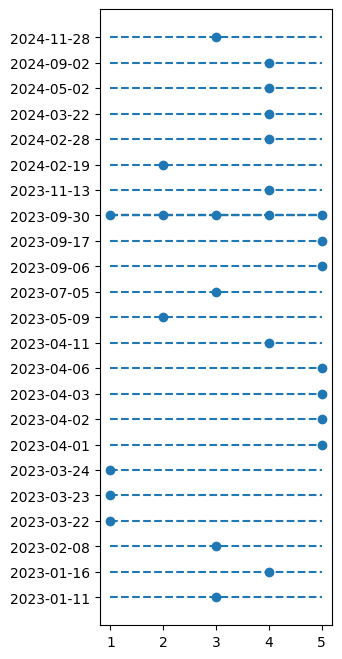

In [188]:
# melihat tanggal dari baris yg kosong

null_row_occurence = pysqldf(""" 
  select 
    substring(tanggal, 0, 11) as tanggal,
    case 
      when stasiun = 'DKI1' then 1
      when stasiun = 'DKI2' then 2
      when stasiun = 'DKI3' then 3
      when stasiun = 'DKI4' then 4
      when stasiun = 'DKI5' then 5             
    end as data
  from null_merge_polutan 
  where 
  pm10 is null and
  pm25 is null and
  so2 is null and
  co is null and
  o3 is null and
  no2 is null
  order by tanggal
""")

plt.figure(figsize=(3, 8))
plt.scatter(null_row_occurence['data'], null_row_occurence['tanggal'])
plt.hlines(y=null_row_occurence['tanggal'], xmax=5, xmin=1, linestyles='dashed')
# plt.xticks(rotation=90)

<Axes: xlabel='year'>

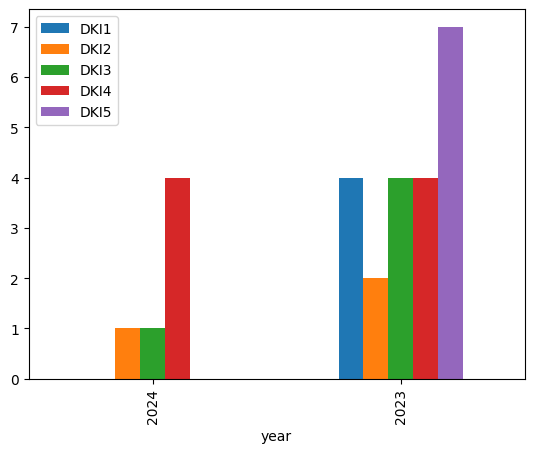

In [189]:
# see null ROW count of every observed pollutant by each region
null_row_plot.plot(
  x='year',
  kind='bar',
  stacked=False,
)

1. baris yg ga punya data samsek bisa 1 hari aja atau lebih
2. paling sering gada datanya samsek dari DKI4
3. anomali di 2023 september 30: tidak ada data pada kelima stasiun

rencana akan pake KNN or RF buat handle missing values

### Seperate Pollutant Data By stasiun

#### DKI1

In [190]:
merge_polutan_dki1 = pysqldf("""SELECT * FROM merge_polutan WHERE stasiun = 'DKI1'""")
merge_polutan_dki1

tanggal stasiun  pm10   pm25   so2    co    o3   no2
0    2023-01-01 00:00:00.000000    DKI1  44.0   55.0  47.0  10.0  24.0   9.0
1    2023-01-02 00:00:00.000000    DKI1  32.0   43.0  52.0   9.0  24.0   8.0
2    2023-01-03 00:00:00.000000    DKI1  31.0   35.0  49.0   9.0  12.0   7.0
3    2023-01-04 00:00:00.000000    DKI1  30.0   47.0  53.0  11.0  15.0   9.0
4    2023-01-05 00:00:00.000000    DKI1  38.0   50.0  50.0  13.0  26.0  11.0
..                          ...     ...   ...    ...   ...   ...   ...   ...
726  2024-12-27 00:00:00.000000    DKI1  53.0   83.0  12.0  10.0  11.0  36.0
727  2024-12-28 00:00:00.000000    DKI1  64.0  101.0  14.0   9.0  11.0  35.0
728  2024-12-29 00:00:00.000000    DKI1  51.0   21.0  13.0  10.0  13.0  35.0
729  2024-12-30 00:00:00.000000    DKI1  35.0   10.0  13.0   5.0  12.0  13.0
730  2024-12-31 00:00:00.000000    DKI1  29.0   11.0   6.0  13.0  10.0  18.0

[731 rows x 8 columns]

In [191]:
merge_polutan_dki1 = merge_polutan_dki1.rename(columns={
  'pm10': 'pm10_dki1',
  'pm25': 'pm25_dki1',
  'so2': 'so2_dki1',
  'co': 'co_dki1',
  'o3': 'o3_dki1',
  'no2': 'no2_dki1'
})
merge_polutan_dki1.pop('stasiun')

0      DKI1
1      DKI1
2      DKI1
3      DKI1
4      DKI1
       ... 
726    DKI1
727    DKI1
728    DKI1
729    DKI1
730    DKI1
Name: stasiun, Length: 731, dtype: object

In [192]:
merge_polutan_dki1.set_index('tanggal', inplace=True)

In [193]:
merge_polutan_dki1

pm10_dki1  pm25_dki1  so2_dki1  co_dki1  o3_dki1  \
tanggal                                                                        
2023-01-01 00:00:00.000000       44.0       55.0      47.0     10.0     24.0   
2023-01-02 00:00:00.000000       32.0       43.0      52.0      9.0     24.0   
2023-01-03 00:00:00.000000       31.0       35.0      49.0      9.0     12.0   
2023-01-04 00:00:00.000000       30.0       47.0      53.0     11.0     15.0   
2023-01-05 00:00:00.000000       38.0       50.0      50.0     13.0     26.0   
...                               ...        ...       ...      ...      ...   
2024-12-27 00:00:00.000000       53.0       83.0      12.0     10.0     11.0   
2024-12-28 00:00:00.000000       64.0      101.0      14.0      9.0     11.0   
2024-12-29 00:00:00.000000       51.0       21.0      13.0     10.0     13.0   
2024-12-30 00:00:00.000000       35.0       10.0      13.0      5.0     12.0   
2024-12-31 00:00:00.000000       29.0       11.0       6.0     13.0     10.0   

                            no2_dki1  
tanggal                               
2023-01-01 00:00:00.000000       9.0  
2023-01-02 00:00:00.000000       8.0  
2023-01-03 00:00:00.000000       7.0  
2023-01-04 00:00:00.000000       9.0  
2023-01-05 00:00:00.000000      11.0  
...                              ...  
2024-12-27 00:00:00.000000      36.0  
2024-12-28 00:00:00.000000      35.0  
2024-12-29 00:00:00.000000      35.0  
2024-12-30 00:00:00.000000      13.0  
2024-12-31 00:00:00.000000      18.0  

[731 rows x 6 columns]

### Univarite Visualization

#### DKI 1

In [203]:
type(merge_polutan_dki1_temp.index[0])

str

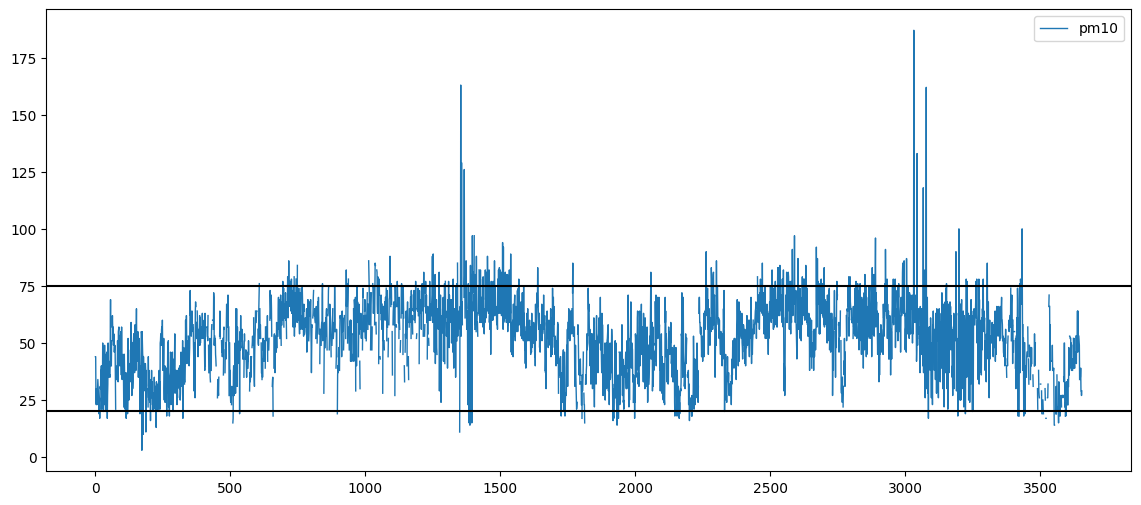

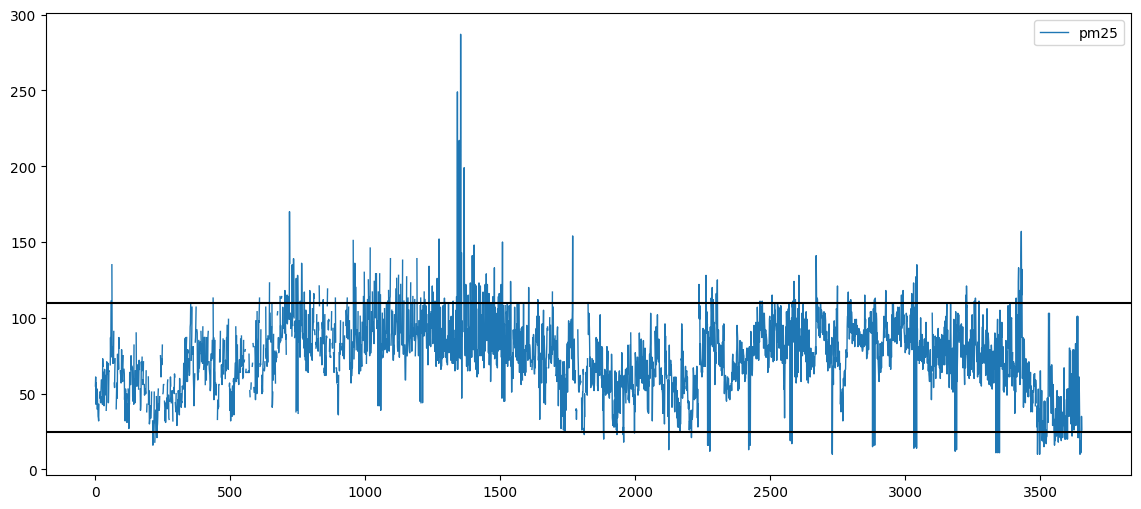

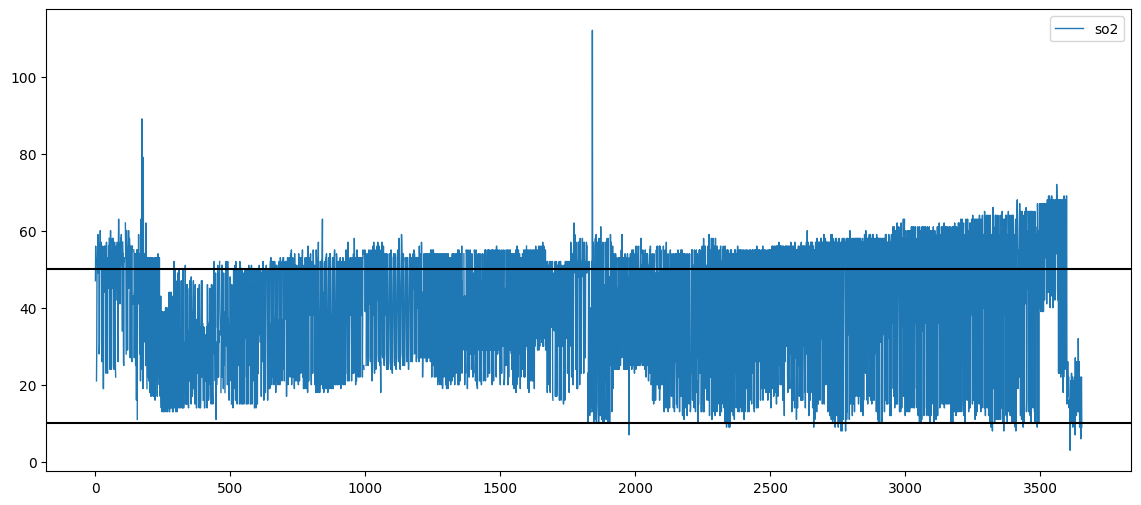

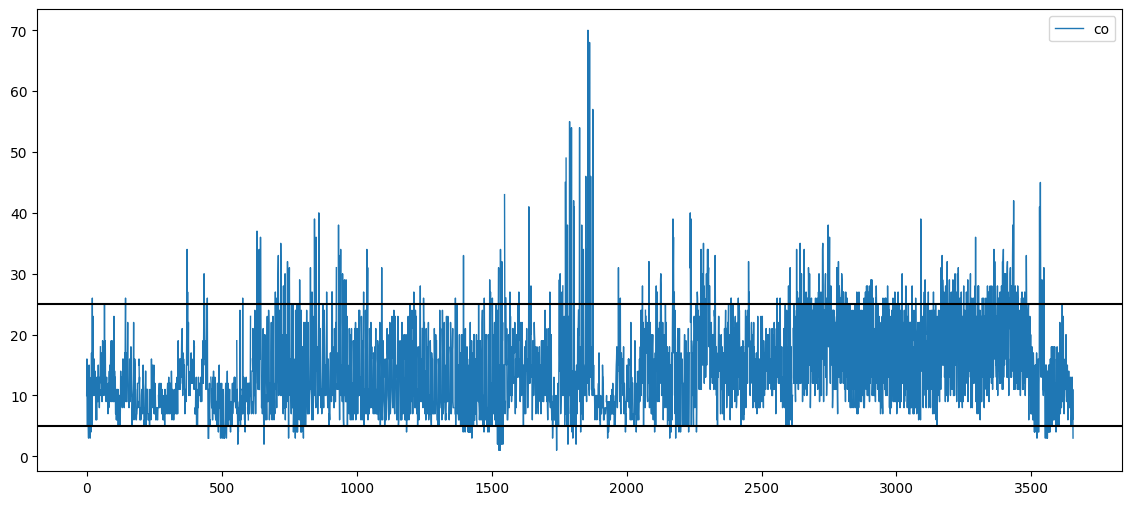

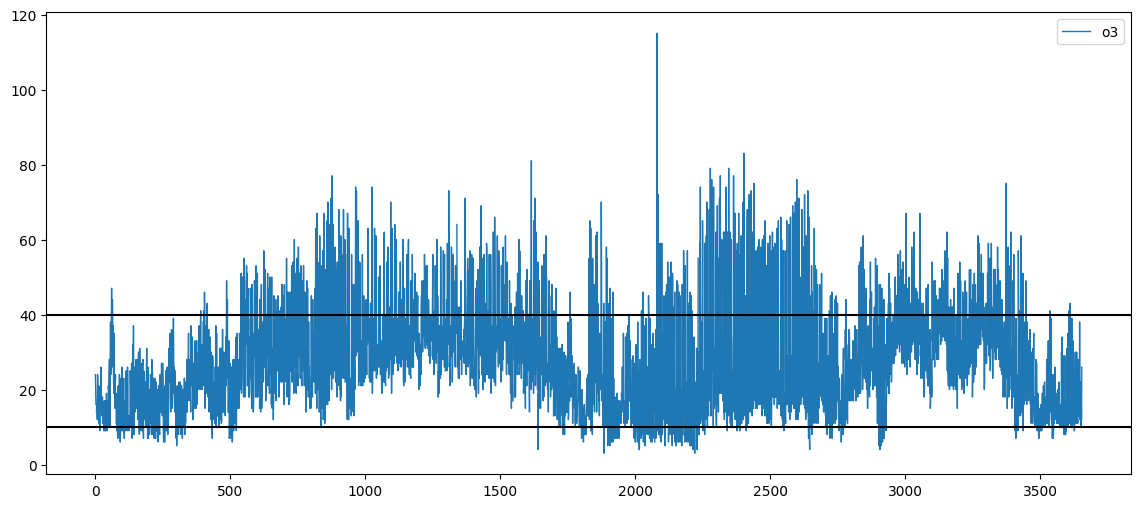

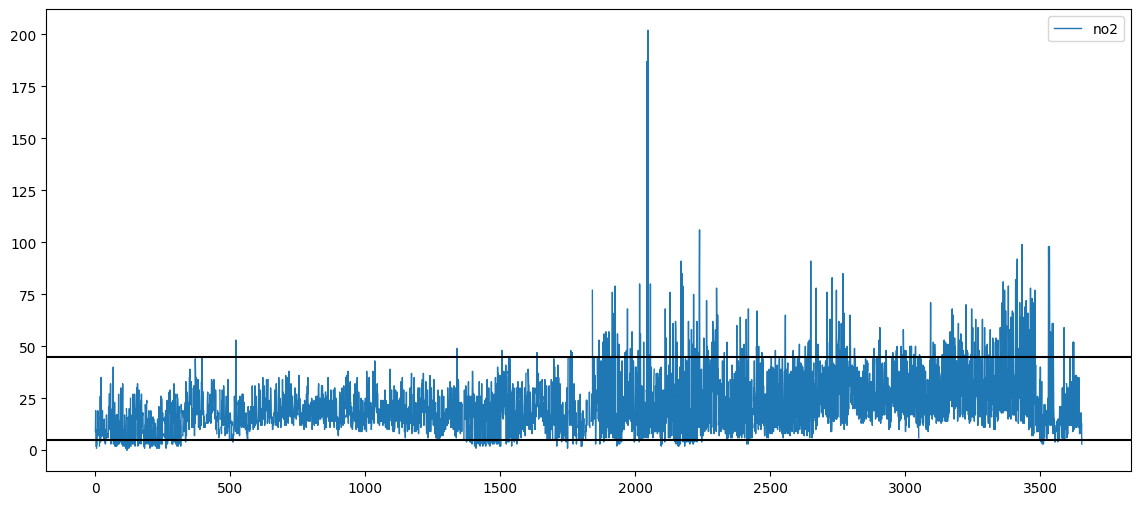

In [199]:
merge_polutan_temp = merge_polutan.copy()
# merge_polutan_temp['tanggal'] = pd.to_datetime(merge_polutan_temp['tanggal'])
# merge_polutan_temp = merge_polutan_temp.set_index('tanggal')

merge_polutan_temp.plot(y='pm10', figsize=(14,6), linewidth=1)
plt.axhline(y=75, color='black')
plt.axhline(y=20, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=25, ymax=32, colors='red')

merge_polutan_temp.plot(y='pm25', figsize=(14,6), linewidth=1)
plt.axhline(y=110, color='black')
plt.axhline(y=25, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=55, ymax=95, colors='red')

merge_polutan_temp.plot(y='so2', figsize=(14,6), linewidth=1)
plt.axhline(y=50, color='black')
plt.axhline(y=10, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=200, colors='red')

merge_polutan_temp.plot(y='co', figsize=(14,6), linewidth=1)
plt.axhline(y=25, color='black')
plt.axhline(y=5, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=10, colors='red')

merge_polutan_temp.plot(y='o3', figsize=(14,6), linewidth=1)
plt.axhline(y=40, color='black')
plt.axhline(y=10, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')

merge_polutan_temp.plot(y='no2', figsize=(14,6), linewidth=1)
plt.axhline(y=45, color='black')
plt.axhline(y=5, color='black')
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')
plt.show()

### Cek Missing Value

1. cek berapa banyak baris yang mengandung missing values
2. cek berapa banyak baris yang seluruh datanya kosong
3. melihat berapa banyak baris dimana stasiun tidak memiliki pengukuran
4. melihat stasiun apa yang paling banyak mengandung missing values


#### 1. cek berapa banyak baris yang mengandung missing values

In [195]:
merge_polutan_dki1.rename(columns={
  'pm10_dki1': 'pm10',
  'pm25_dki1': 'pm25',
  'so2_dki1': 'so2',
  'co_dki1': 'co',
  'o3_dki1': 'o3',
  'no2_dki1': 'no2'
}, inplace=True)

In [196]:
merge_polutan_dki1

pm10   pm25   so2    co    o3   no2
tanggal                                                        
2023-01-01 00:00:00.000000  44.0   55.0  47.0  10.0  24.0   9.0
2023-01-02 00:00:00.000000  32.0   43.0  52.0   9.0  24.0   8.0
2023-01-03 00:00:00.000000  31.0   35.0  49.0   9.0  12.0   7.0
2023-01-04 00:00:00.000000  30.0   47.0  53.0  11.0  15.0   9.0
2023-01-05 00:00:00.000000  38.0   50.0  50.0  13.0  26.0  11.0
...                          ...    ...   ...   ...   ...   ...
2024-12-27 00:00:00.000000  53.0   83.0  12.0  10.0  11.0  36.0
2024-12-28 00:00:00.000000  64.0  101.0  14.0   9.0  11.0  35.0
2024-12-29 00:00:00.000000  51.0   21.0  13.0  10.0  13.0  35.0
2024-12-30 00:00:00.000000  35.0   10.0  13.0   5.0  12.0  13.0
2024-12-31 00:00:00.000000  29.0   11.0   6.0  13.0  10.0  18.0

[731 rows x 6 columns]

In [91]:
#1. cek berapa banyak baris yang mengandung missing values
merge_polutan_dki1[merge_polutan_dki1.isna().any(axis=1)]

tanggal  pm10   pm25    so2    co    o3   no2
20   2023-01-21 00:00:00.000000  42.0   59.0    NaN   9.0  10.0  20.0
21   2023-01-22 00:00:00.000000  37.0   46.0    NaN   7.0  11.0  17.0
22   2023-01-23 00:00:00.000000  21.0   32.0    NaN   6.0  13.0  12.0
23   2023-01-24 00:00:00.000000  29.0   39.0    NaN   7.0  10.0  20.0
53   2023-02-23 00:00:00.000000  36.0   47.0   40.0   NaN  23.0  23.0
62   2023-03-04 00:00:00.000000  31.0   40.0   50.0   NaN  18.0  21.0
80   2023-03-22 00:00:00.000000   NaN    NaN    NaN   NaN   NaN   NaN
81   2023-03-23 00:00:00.000000   NaN    NaN    NaN   NaN   NaN   NaN
82   2023-03-24 00:00:00.000000   NaN    NaN    NaN   NaN   NaN   NaN
272  2023-09-30 00:00:00.000000   NaN    NaN    NaN   NaN   NaN   NaN
286  2023-10-14 00:00:00.000000  65.0  102.0   47.0   NaN  24.0  32.0
287  2023-10-15 00:00:00.000000  62.0   98.0   48.0   NaN  25.0  22.0
288  2023-10-16 00:00:00.000000  59.0   96.0   50.0   NaN  31.0  24.0
289  2023-10-17 00:00:00.000000  61.0   93.0   49.0   NaN  43.0  25.0
353  2023-12-20 00:00:00.000000  65.0   95.0   53.0   NaN  24.0  12.0
354  2023-12-21 00:00:00.000000  53.0   71.0   57.0   NaN  26.0  13.0
355  2023-12-22 00:00:00.000000  39.0   59.0   52.0   NaN  15.0   9.0
368  2024-01-04 00:00:00.000000  30.0    NaN  112.0  20.0   8.0  77.0
383  2024-01-19 00:00:00.000000  19.0   31.0   46.0   NaN  12.0  20.0
384  2024-01-20 00:00:00.000000  26.0   28.0   44.0   NaN  17.0  17.0
391  2024-01-27 00:00:00.000000  21.0   18.0   45.0   NaN  17.0  22.0
393  2024-01-29 00:00:00.000000  30.0    NaN   44.0   8.0  17.0  28.0
410  2024-02-15 00:00:00.000000  35.0   55.0    NaN  18.0  22.0  29.0
523  2024-06-07 00:00:00.000000  58.0   82.0   16.0   NaN  24.0  41.0
673  2024-11-04 00:00:00.000000  44.0   60.0    8.0  25.0   NaN  37.0
696  2024-11-27 00:00:00.000000  50.0    NaN   10.0  33.0  10.0  27.0

In [99]:
merge_polutan_dki1[merge_polutan_dki1.isna().any(axis=1)].shape[0]

26


In [ ]:
merge_polutan_dki1.shape[0]

731

**Updated on 12 Mar 2025**

**2023-2024: 56.49% rows containing missing values**

total rows: 731

contains null: 413

#### #2. melihat berapa banyak baris dimana stasiun tidak memiliki pengukuran

In [95]:
complete_null_polutan_dki1 = merge_polutan_dki1[(merge_polutan_dki1[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].isnull().all(axis=1))]


In [96]:
complete_null_polutan_dki1

tanggal  pm10  pm25  so2  co  o3  no2
80   2023-03-22 00:00:00.000000   NaN   NaN  NaN NaN NaN  NaN
81   2023-03-23 00:00:00.000000   NaN   NaN  NaN NaN NaN  NaN
82   2023-03-24 00:00:00.000000   NaN   NaN  NaN NaN NaN  NaN
272  2023-09-30 00:00:00.000000   NaN   NaN  NaN NaN NaN  NaN

#### 3. melihat stasiun apa yang paling banyak mengandung missing values

In [100]:
#4. melihat stasiun apa yang paling banyak mengandung missing values
null_merge_polutan = merge_polutan_dki1[merge_polutan_dki1.isnull().any(axis=1)]

count_null_merge_polutan = pysqldf(
"""
  select 
    sum(case when pm10 is null then 1 else 0 end) as pm10,
    sum(case when pm25 is null then 1 else 0 end) as pm25,
    sum(case when so2 is null then 1 else 0 end) as so2,
    sum(case when co is null then 1 else 0 end) as co,
    sum(case when o3 is null then 1 else 0 end) as o3,
    sum(case when no2 is null then 1 else 0 end) as no2
  from merge_polutan_dki1
"""
)

count_null_merge_polutan

pm10  pm25  so2  co  o3  no2
0     4     7    9  17   5    4

In [103]:
merge_polutan_dki1.isnull().sum()

tanggal     0
pm10        4
pm25        7
so2         9
co         17
o3          5
no2         4
dtype: int64

<Axes: title={'center': 'Missing Values per Column'}>

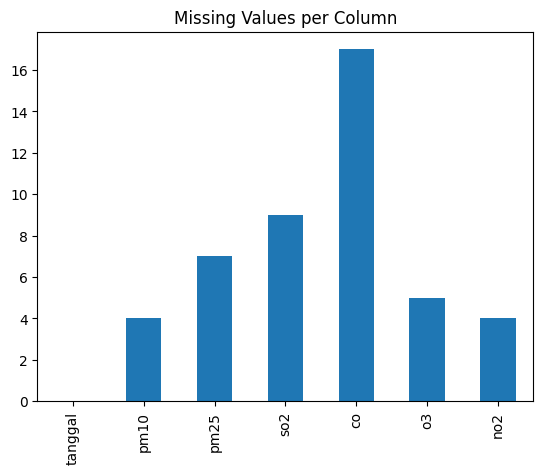

In [104]:
merge_polutan_dki1.isnull().sum().plot(kind='bar', title='Missing Values per Column')

<Axes: >

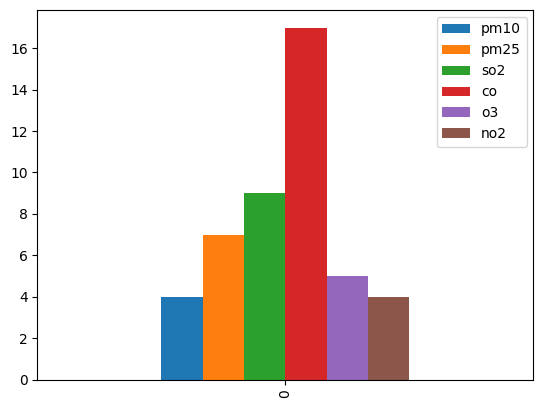

In [290]:
# see null count of every observed pollutant by each region
count_null_merge_polutan.plot(
  kind='bar',
  stacked=False
)

### Proses Missing Values

1. data polutan akan digabung terlebih dahulu dengan data meteorologi, karena Dinas Lingkungan Hidup menyatakan bahwa data meteorologi mempengaruhi perhitungan ispu
2. setelah itu, missing pada data polutan akan diimpute menggunakan KNNImputer
3. dan juga, untuk baris yang semua datanya kosong, akan digunakan linear interpolation untuk imputasinya

In [161]:
pd.set_option("display.max_columns", None)

In [291]:
merge_polutan_dki1

tanggal  pm10   pm25   so2    co    o3   no2
0    2023-01-01 00:00:00.000000  44.0   55.0  47.0  10.0  24.0   9.0
1    2023-01-02 00:00:00.000000  32.0   43.0  52.0   9.0  24.0   8.0
2    2023-01-03 00:00:00.000000  31.0   35.0  49.0   9.0  12.0   7.0
3    2023-01-04 00:00:00.000000  30.0   47.0  53.0  11.0  15.0   9.0
4    2023-01-05 00:00:00.000000  38.0   50.0  50.0  13.0  26.0  11.0
..                          ...   ...    ...   ...   ...   ...   ...
726  2024-12-27 00:00:00.000000  53.0   83.0  12.0  10.0  11.0  36.0
727  2024-12-28 00:00:00.000000  64.0  101.0  14.0   9.0  11.0  35.0
728  2024-12-29 00:00:00.000000  51.0   21.0  13.0  10.0  13.0  35.0
729  2024-12-30 00:00:00.000000  35.0   10.0  13.0   5.0  12.0  13.0
730  2024-12-31 00:00:00.000000  29.0   11.0   6.0  13.0  10.0  18.0

[731 rows x 7 columns]

In [293]:
temp_all_merge_polutan = merge_polutan_dki1.copy()

temp_all_merge_polutan = temp_all_merge_polutan.reset_index()
temp_all_merge_polutan['tanggal'] = pd.to_datetime(temp_all_merge_polutan['tanggal']).dt.date
temp_all_merge_polutan_index = temp_all_merge_polutan['tanggal']
temp_all_merge_polutan = temp_all_merge_polutan.set_index('tanggal')
temp_all_merge_polutan = temp_all_merge_polutan.join(data_meteorologi)
temp_all_merge_polutan

index  pm10   pm25   so2    co    o3   no2  Tavg_km  RH_avg_km  \
tanggal                                                                      
2023-01-01      0  44.0   55.0  47.0  10.0  24.0   9.0     26.3       87.0   
2023-01-02      1  32.0   43.0  52.0   9.0  24.0   8.0     27.5       81.0   
2023-01-03      2  31.0   35.0  49.0   9.0  12.0   7.0     26.6       82.0   
2023-01-04      3  30.0   47.0  53.0  11.0  15.0   9.0     26.4       86.0   
2023-01-05      4  38.0   50.0  50.0  13.0  26.0  11.0     27.4       83.0   
...           ...   ...    ...   ...   ...   ...   ...      ...        ...   
2024-12-27    726  53.0   83.0  12.0  10.0  11.0  36.0     29.2       78.0   
2024-12-28    727  64.0  101.0  14.0   9.0  11.0  35.0     30.0       70.0   
2024-12-29    728  51.0   21.0  13.0  10.0  13.0  35.0     29.7       73.0   
2024-12-30    729  35.0   10.0  13.0   5.0  12.0  13.0     28.4       76.0   
2024-12-31    730  29.0   11.0   6.0  13.0  10.0  18.0     28.4       76.0   

            RR_km  ss_km  ff_avg_km  DDD_CAR_km  
tanggal                                          
2023-01-01   14.5    0.0        1.0         1.0  
2023-01-02   31.5    0.7        2.0         9.0  
2023-01-03    0.5    0.0        1.0         1.0  
2023-01-04    2.4    2.1        1.0         1.0  
2023-01-05   35.3    4.9        2.0         1.0  
...           ...    ...        ...         ...  
2024-12-27    7.5    1.2        2.0         1.0  
2024-12-28    0.6    3.8        2.0         1.0  
2024-12-29    0.0    3.0        1.0         1.0  
2024-12-30    1.0    1.8        2.0         7.0  
2024-12-31    2.0    2.4        2.0         8.0  

[731 rows x 13 columns]

In [294]:
data_meteorologi

Tavg_km  RH_avg_km  RR_km  ss_km  ff_avg_km  DDD_CAR_km
Tanggal                                                            
2023-01-01     26.3       87.0   14.5    0.0        1.0         1.0
2023-01-02     27.5       81.0   31.5    0.7        2.0         9.0
2023-01-03     26.6       82.0    0.5    0.0        1.0         1.0
2023-01-04     26.4       86.0    2.4    2.1        1.0         1.0
2023-01-05     27.4       83.0   35.3    4.9        2.0         1.0
...             ...        ...    ...    ...        ...         ...
2024-12-27     29.2       78.0    7.5    1.2        2.0         1.0
2024-12-28     30.0       70.0    0.6    3.8        2.0         1.0
2024-12-29     29.7       73.0    0.0    3.0        1.0         1.0
2024-12-30     28.4       76.0    1.0    1.8        2.0         7.0
2024-12-31     28.4       76.0    2.0    2.4        2.0         8.0

[731 rows x 6 columns]

In [296]:
temp_all_merge_polutan

index  pm10   pm25   so2    co    o3   no2  Tavg_km  RH_avg_km  \
tanggal                                                                      
2023-01-01      0  44.0   55.0  47.0  10.0  24.0   9.0     26.3       87.0   
2023-01-02      1  32.0   43.0  52.0   9.0  24.0   8.0     27.5       81.0   
2023-01-03      2  31.0   35.0  49.0   9.0  12.0   7.0     26.6       82.0   
2023-01-04      3  30.0   47.0  53.0  11.0  15.0   9.0     26.4       86.0   
2023-01-05      4  38.0   50.0  50.0  13.0  26.0  11.0     27.4       83.0   
...           ...   ...    ...   ...   ...   ...   ...      ...        ...   
2024-12-27    726  53.0   83.0  12.0  10.0  11.0  36.0     29.2       78.0   
2024-12-28    727  64.0  101.0  14.0   9.0  11.0  35.0     30.0       70.0   
2024-12-29    728  51.0   21.0  13.0  10.0  13.0  35.0     29.7       73.0   
2024-12-30    729  35.0   10.0  13.0   5.0  12.0  13.0     28.4       76.0   
2024-12-31    730  29.0   11.0   6.0  13.0  10.0  18.0     28.4       76.0   

            RR_km  ss_km  ff_avg_km  DDD_CAR_km  
tanggal                                          
2023-01-01   14.5    0.0        1.0         1.0  
2023-01-02   31.5    0.7        2.0         9.0  
2023-01-03    0.5    0.0        1.0         1.0  
2023-01-04    2.4    2.1        1.0         1.0  
2023-01-05   35.3    4.9        2.0         1.0  
...           ...    ...        ...         ...  
2024-12-27    7.5    1.2        2.0         1.0  
2024-12-28    0.6    3.8        2.0         1.0  
2024-12-29    0.0    3.0        1.0         1.0  
2024-12-30    1.0    1.8        2.0         7.0  
2024-12-31    2.0    2.4        2.0         8.0  

[731 rows x 13 columns]

In [297]:
imputer = KNNImputer()
imputed_all_merge_polutan = imputer.fit_transform(temp_all_merge_polutan)

In [298]:
# temp_all_merge_polutan = temp_all_merge_polutan.reset_index()
imputed_all_merge_polutan = pd.DataFrame(imputed_all_merge_polutan, columns=temp_all_merge_polutan.columns, index=temp_all_merge_polutan_index)

In [299]:
imputed_all_merge_polutan

index  pm10   pm25   so2    co    o3   no2  Tavg_km  RH_avg_km  \
tanggal                                                                      
2023-01-01    0.0  44.0   55.0  47.0  10.0  24.0   9.0     26.3       87.0   
2023-01-02    1.0  32.0   43.0  52.0   9.0  24.0   8.0     27.5       81.0   
2023-01-03    2.0  31.0   35.0  49.0   9.0  12.0   7.0     26.6       82.0   
2023-01-04    3.0  30.0   47.0  53.0  11.0  15.0   9.0     26.4       86.0   
2023-01-05    4.0  38.0   50.0  50.0  13.0  26.0  11.0     27.4       83.0   
...           ...   ...    ...   ...   ...   ...   ...      ...        ...   
2024-12-27  726.0  53.0   83.0  12.0  10.0  11.0  36.0     29.2       78.0   
2024-12-28  727.0  64.0  101.0  14.0   9.0  11.0  35.0     30.0       70.0   
2024-12-29  728.0  51.0   21.0  13.0  10.0  13.0  35.0     29.7       73.0   
2024-12-30  729.0  35.0   10.0  13.0   5.0  12.0  13.0     28.4       76.0   
2024-12-31  730.0  29.0   11.0   6.0  13.0  10.0  18.0     28.4       76.0   

            RR_km  ss_km  ff_avg_km  DDD_CAR_km  
tanggal                                          
2023-01-01   14.5    0.0        1.0         1.0  
2023-01-02   31.5    0.7        2.0         9.0  
2023-01-03    0.5    0.0        1.0         1.0  
2023-01-04    2.4    2.1        1.0         1.0  
2023-01-05   35.3    4.9        2.0         1.0  
...           ...    ...        ...         ...  
2024-12-27    7.5    1.2        2.0         1.0  
2024-12-28    0.6    3.8        2.0         1.0  
2024-12-29    0.0    3.0        1.0         1.0  
2024-12-30    1.0    1.8        2.0         7.0  
2024-12-31    2.0    2.4        2.0         8.0  

[731 rows x 13 columns]

In [301]:
imputed_all_merge_polutan.columns

Index(['index', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'Tavg_km',
       'RH_avg_km', 'RR_km', 'ss_km', 'ff_avg_km', 'DDD_CAR_km'],
      dtype='object')

In [300]:
imputed_all_merge_polutan.to_csv('./preprocessed_main_data_dki1_kemayoran.csv')

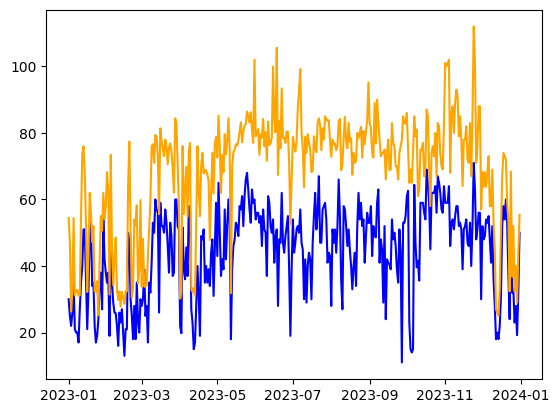

In [169]:
# impute with meteorological
plt.plot(imputed_all_merge_polutan.loc[imputed_all_merge_polutan.index < date(2024, 1, 1), 'pm10_dki5'], label='pm10_dki5', c='blue')
plt.plot(imputed_all_merge_polutan.loc[imputed_all_merge_polutan.index < date(2024, 1, 1), 'pm25_dki5'], label='pm25_dki5', c='orange')

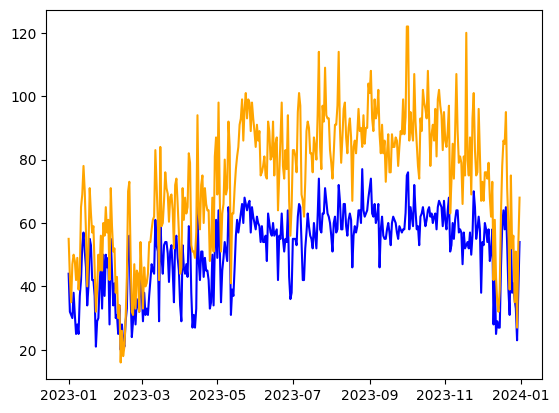

In [170]:
# impute with meteorological
plt.plot(imputed_all_merge_polutan.loc[imputed_all_merge_polutan.index < date(2024, 1, 1), 'pm10_dki1'], label='pm10_dki1', c='blue')
plt.plot(imputed_all_merge_polutan.loc[imputed_all_merge_polutan.index < date(2024, 1, 1), 'pm25_dki1'], label='pm25_dki1', c='orange')

In [171]:
imputed_all_merge_polutan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2023-01-01 to 2024-12-31
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm10_dki1   731 non-null    float64
 1   pm25_dki1   731 non-null    float64
 2   so2_dki1    731 non-null    float64
 3   co_dki1     731 non-null    float64
 4   o3_dki1     731 non-null    float64
 5   no2_dki1    731 non-null    float64
 6   pm10_dki2   731 non-null    float64
 7   pm25_dki2   731 non-null    float64
 8   so2_dki2    731 non-null    float64
 9   co_dki2     731 non-null    float64
 10  o3_dki2     731 non-null    float64
 11  no2_dki2    731 non-null    float64
 12  pm10_dki3   731 non-null    float64
 13  pm25_dki3   731 non-null    float64
 14  so2_dki3    731 non-null    float64
 15  co_dki3     731 non-null    float64
 16  o3_dki3     731 non-null    float64
 17  no2_dki3    731 non-null    float64
 18  pm10_dki4   731 non-null    float64
 19  pm25_dki4   731 no

In [172]:
imputed_all_merge_polutan

pm10_dki1  pm25_dki1  so2_dki1  co_dki1  o3_dki1  no2_dki1  \
tanggal                                                                  
2023-01-01       44.0       55.0      47.0     10.0     24.0       9.0   
2023-01-02       32.0       43.0      52.0      9.0     24.0       8.0   
2023-01-03       31.0       35.0      49.0      9.0     12.0       7.0   
2023-01-04       30.0       47.0      53.0     11.0     15.0       9.0   
2023-01-05       38.0       50.0      50.0     13.0     26.0      11.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       53.0       83.0      12.0     10.0     11.0      36.0   
2024-12-28       64.0      101.0      14.0      9.0     11.0      35.0   
2024-12-29       51.0       21.0      13.0     10.0     13.0      35.0   
2024-12-30       35.0       10.0      13.0      5.0     12.0      13.0   
2024-12-31       29.0       11.0       6.0     13.0     10.0      18.0   

            pm10_dki2  pm25_dki2  so2_dki2  co_dki2  o3_dki2  no2_dki2  \
tanggal                                                                  
2023-01-01       44.0       61.0      56.0     16.0     20.0      19.0   
2023-01-02       34.0       43.0      59.0     15.0     21.0      19.0   
2023-01-03       28.0       34.0      57.0     13.0     21.0      16.0   
2023-01-04       31.0       49.0      60.0     17.0     21.0      26.0   
2023-01-05       37.0       53.0      57.0     26.0     21.0      35.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       41.0       55.0      24.0     15.0     12.0      11.0   
2024-12-28       46.0       59.0      25.0     14.0     12.0      15.0   
2024-12-29       49.0       61.0      26.0     13.0     14.0      12.0   
2024-12-30       34.0       50.0      21.0     11.0     14.0      11.0   
2024-12-31       29.0       35.0      22.0     11.0     12.0      13.0   

            pm10_dki3  pm25_dki3  so2_dki3  co_dki3  o3_dki3  no2_dki3  \
tanggal                                                                  
2023-01-01       26.0       43.0      51.0      5.0     16.0       2.0   
2023-01-02       23.0       40.0      51.0      5.0     16.0       3.0   
2023-01-03       25.0       32.0      53.0      4.0     15.0       2.2   
2023-01-04       30.0       44.0      53.0      5.0     15.0       4.0   
2023-01-05       40.0       59.0      53.0     10.0     18.0       7.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       53.0       83.0      12.0     10.0     11.0      36.0   
2024-12-28       64.0      101.0      14.0      9.0     11.0      35.0   
2024-12-29       51.0       21.0      13.0     10.0     13.0      35.0   
2024-12-30       35.0       10.0      13.0      5.0     12.0      13.0   
2024-12-31       29.0       11.0       6.0     13.0     10.0      18.0   

            pm10_dki4  pm25_dki4  so2_dki4  co_dki4  o3_dki4  no2_dki4  \
tanggal                                                                  
2023-01-01       23.0       57.0      47.4     10.0     10.8      10.8   
2023-01-02       27.0       53.0      53.0      3.0     12.0      10.0   
2023-01-03       19.0       43.0      53.0      3.0     11.0       9.0   
2023-01-04       17.0       51.0      53.0      4.0      9.0      10.0   
2023-01-05       21.0       59.0      53.0     19.0     14.0      11.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       44.0       29.0      21.0     11.0     17.0      14.0   
2024-12-28       50.0       33.0      23.0      9.0     20.0      13.0   
2024-12-29       53.0       37.0      23.0     12.0     19.0      14.0   
2024-12-30       39.0       19.0      22.0      7.0     22.0      11.0   
2024-12-31       27.0       15.0      21.0      6.0     18.0       8.0   

            pm10_dki5  pm25_dki5  so2_dki5  co_dki5  o3_dki5  no2_dki5  \
tanggal                                                                  
2023-01-01  

In [173]:
imputed_all_merge_polutan2 = imputed_all_merge_polutan.reset_index()
# imputed_all_merge_polutan2['tanggal'] = (imputed_all_merge_polutan2['tanggal'])  # Ensure 'tanggal' is datetime
imputed_all_merge_polutan2['season'] = pd.to_datetime(imputed_all_merge_polutan2['tanggal']).dt.dayofweek.map(lambda x: 1 if x >= 5 else 0)


In [174]:
imputed_all_merge_polutan2 = imputed_all_merge_polutan2.set_index('tanggal')

In [175]:
imputed_all_merge_polutan = imputed_all_merge_polutan2.copy()

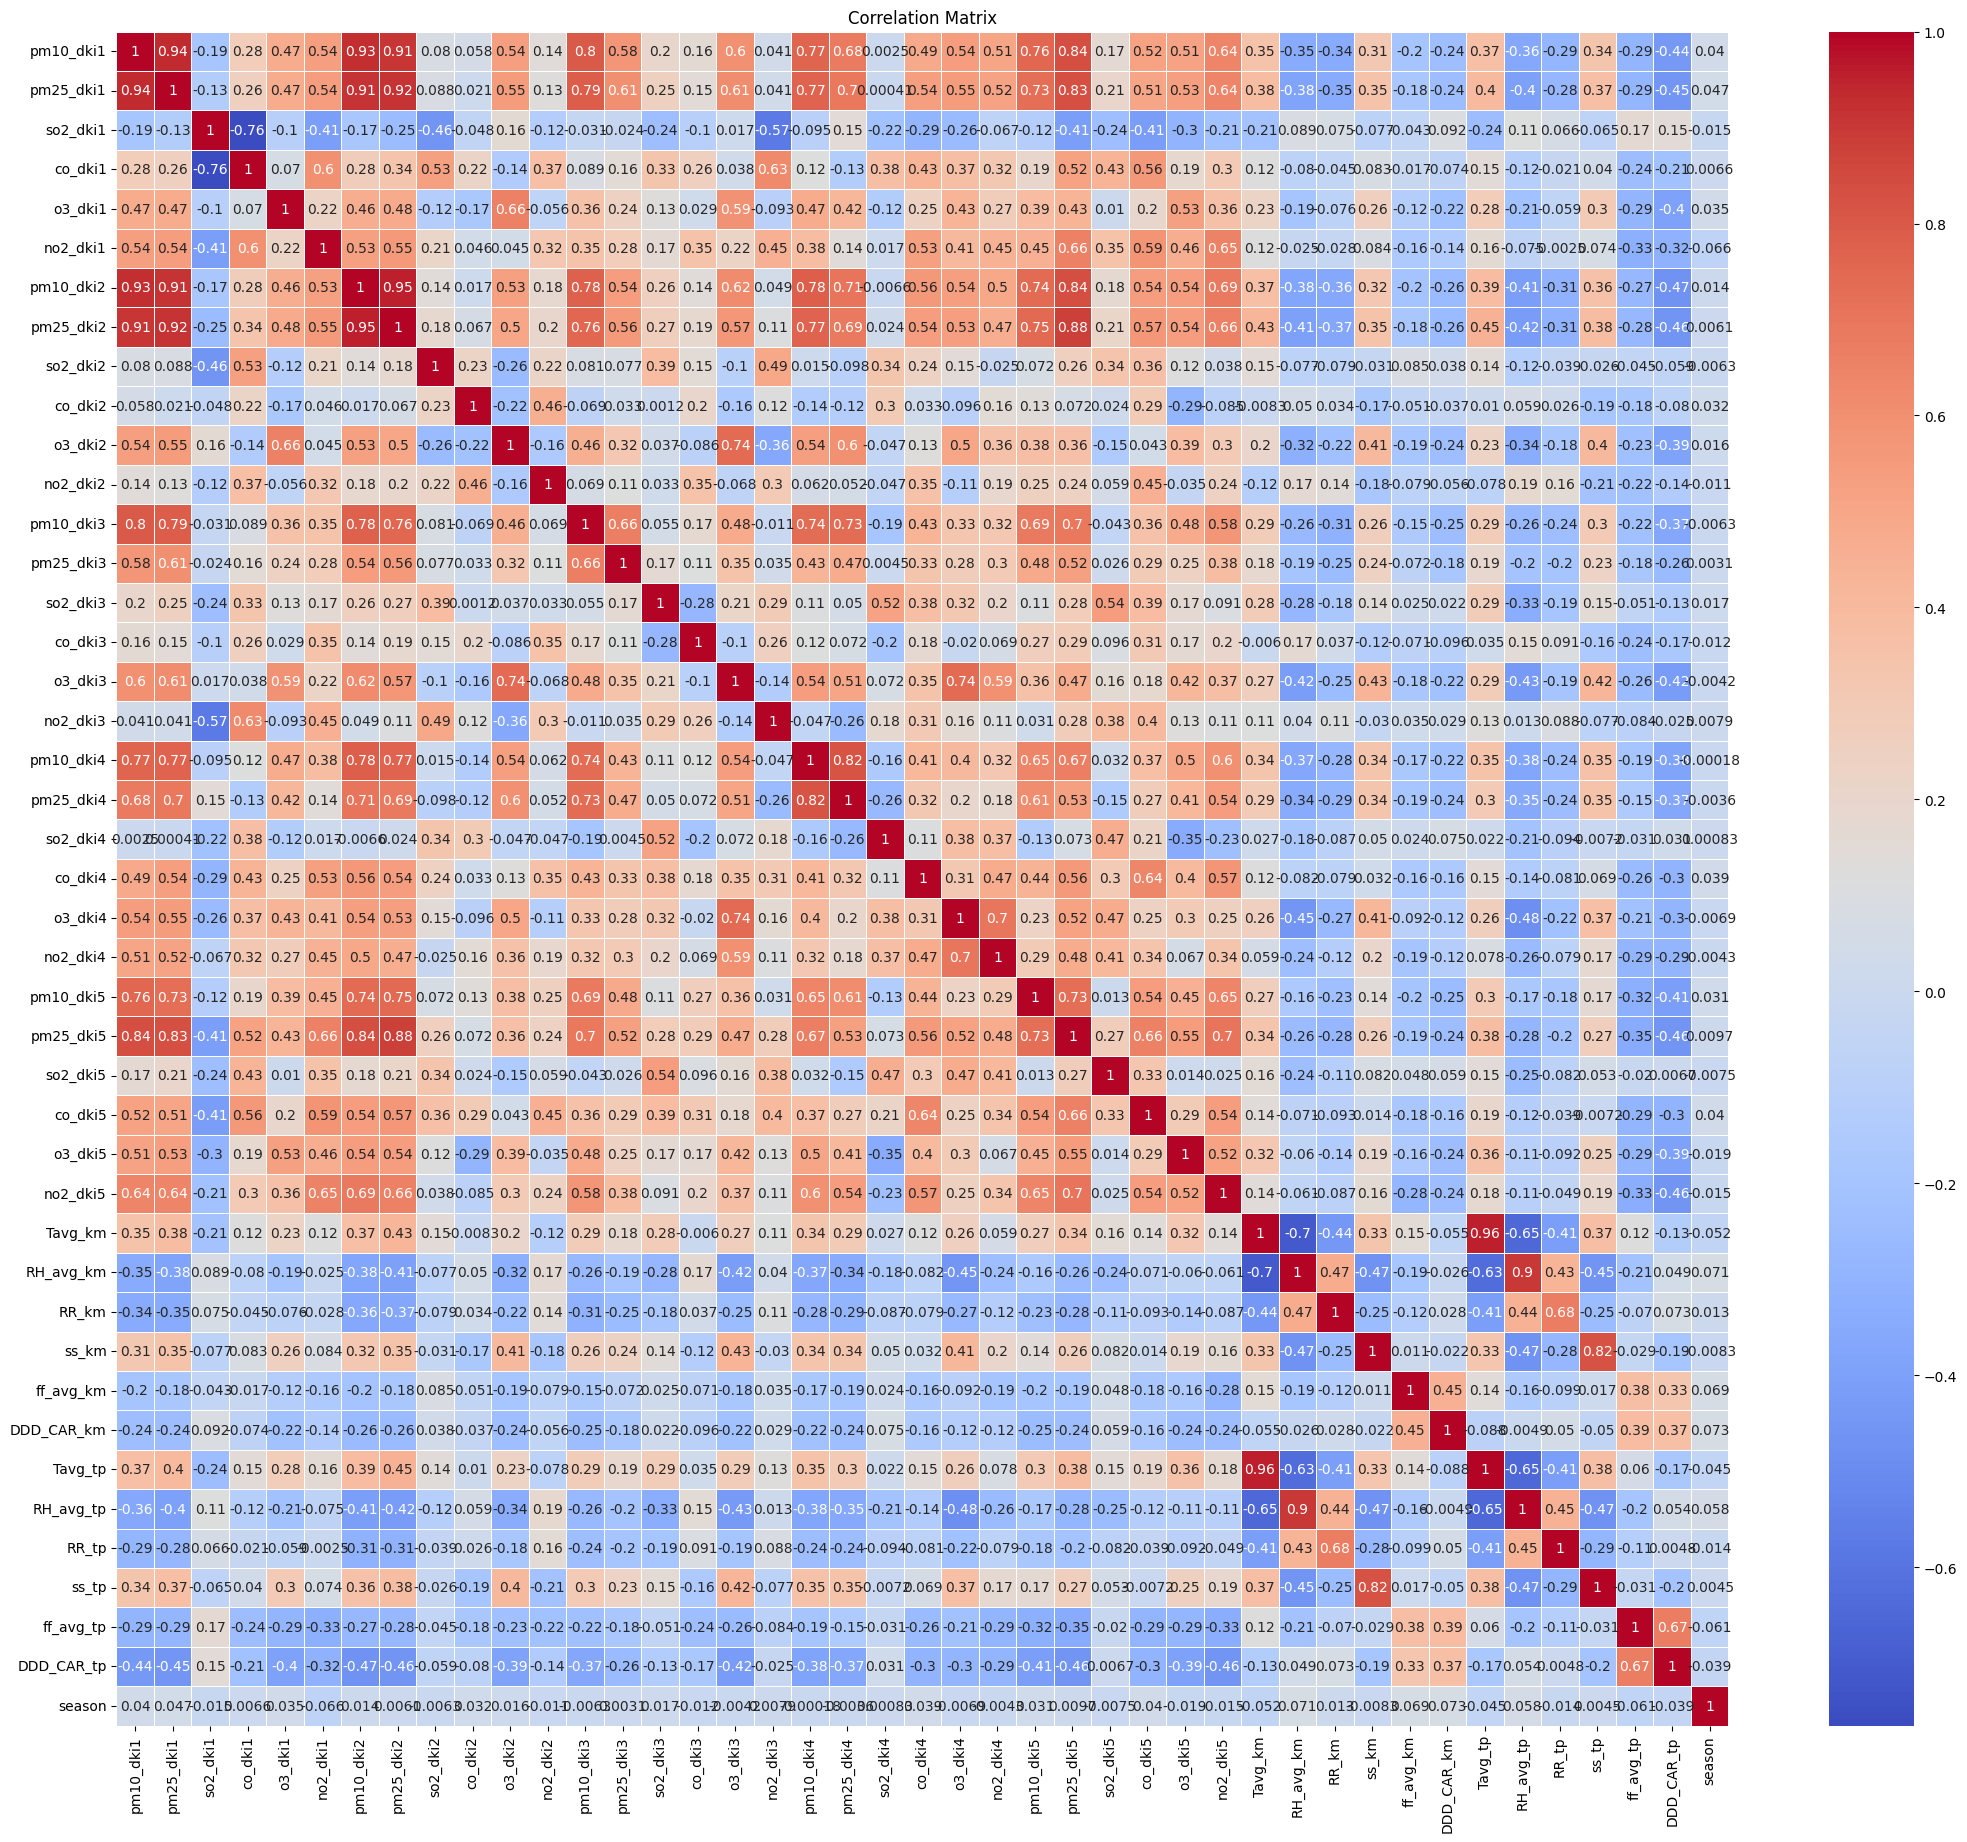

In [176]:
# Create a heatmap
plt.figure(figsize=(26, 22))
sns.heatmap(imputed_all_merge_polutan.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [177]:
holidays_2023 = {
    '2023-01-01': 'New Year 2023',
    '2023-01-22': 'Chinese New Year 2574 Kongzili',
    '2023-02-18': 'Isra Mi’raj (Ascension Day) of Prophet Muhammad.',
    '2023-03-22': 'the Holy Day of Silence, Saka New Year 1945',
    '2023-04-07': 'Good Friday',
    '2023-04-22': 'Eid Al-Fitr 1444 Hijri',
    '2023-04-23': 'Eid Al-Fitr 1444 Hijri',
    '2023-05-01': 'International Labor Day',
    '2023-05-18': 'Ascension of Jesus Christ',
    '2023-06-01': 'Pancasila Day',
    '2023-06-04': 'Vesak Day 2567',
    '2023-06-29': 'Eid al-Adha 1444 Hijri',
    '2023-07-19': 'Islamic New Year 1445 Hijri',
    '2023-08-17': 'Independence Day of the Republic of Indonesia',
    '2023-09-28': 'Birthday of Prophet Muhammad',
    '2023-12-25': 'Christmas Day'
}

collective_leaves_2023 = {
    '2023-01-23': 'Chinese New Year 2574 Kongzili (Collective Leave)',
    '2023-03-23': 'the Holy Day of Silence, Saka New Year 1945 (Collective Leave)',
    '2023-04-21': 'Eid Al-Fitr 1444 Hijri (Collective Leave)',
    '2023-04-24': 'Eid Al-Fitr 1444 Hijri (Collective Leave)',
    '2023-04-25': 'Eid Al-Fitr 1444 Hijri (Collective Leave)',
    '2023-04-26': 'Eid Al-Fitr 1444 Hijri (Collective Leave)',
    '2023-06-02': 'Vesak Day 2567 (Collective Leave)',
    '2023-12-26': 'Christmas Day (Collective Leave)'
}

holidays_2024 = {
    '2024-01-01': 'New Year 2024',
    '2024-02-08': 'Isra Mi’raj (Ascension Day) of Prophet Muhammad.',
    '2024-02-10': 'Chinese New Year 2575 Kongzili',
    '2024-03-11': 'the Holy Day of Silence, Saka New Year 1946',
    '2024-03-29': 'Good Friday',
    '2024-03-31': 'Easter Day',
    '2024-04-10': 'Eid Al-Fitr 1445 Hijri',
    '2024-04-11': 'Eid Al-Fitr 1445 Hijri',
    '2024-05-01': 'International Labor Day',
    '2024-05-09': 'Ascension of Jesus Christ',
    '2024-05-23': 'Vesak Day 2568 BE',
    '2024-06-01': 'Pancasila Day',
    '2024-06-17': 'Eid al-Adha 1445 Hijri',
    '2024-07-07': 'Islamic New Year 1446 Hijri',
    '2024-08-17': 'Independence Day of the Republic of Indonesia',
    '2024-09-16': 'Birthday of Prophet Muhammad',
    '2024-12-25': 'Christmas Day'
}

collective_leaves_2024 = {
    '2024-02-09': 'Chinese New Year 2575 Kongzili (Collective Leave)',
    '2024-03-12': 'the Holy Day of Silence, Saka New Year 1946 (Collective Leave)',
    '2024-04-08': 'Eid Al-Fitr 1445 Hijri (Collective Leave)',
    '2024-04-09': 'Eid Al-Fitr 1445 Hijri (Collective Leave)',
    '2024-04-12': 'Eid Al-Fitr 1445 Hijri (Collective Leave)',
    '2024-04-15': 'Eid Al-Fitr 1445 Hijri (Collective Leave)',
    '2024-05-10': 'Ascension of Jesus Christ (Collective Leave)',
    '2024-05-24': 'Vesak Day (Collective Leave)',
    '2024-06-18': 'Eid al-Adha 1445 Hijri (Collective Leave)',
    '2024-12-26': 'Christmas Day (Collective Leave)'
}

all_dates_2024 = {**holidays_2023, **collective_leaves_2023, **holidays_2024, **collective_leaves_2024}

holidays = pd.Series(all_dates_2024)
holidays = holidays.index


In [178]:
imputed_all_merge_polutan['holiday'] = 0
for date_str in holidays:
  date = pd.to_datetime(date_str).date()
  if date in imputed_all_merge_polutan.index:
        imputed_all_merge_polutan.loc[date, 'holiday'] = 1

In [179]:
imputed_all_merge_polutan

pm10_dki1  pm25_dki1  so2_dki1  co_dki1  o3_dki1  no2_dki1  \
tanggal                                                                  
2023-01-01       44.0       55.0      47.0     10.0     24.0       9.0   
2023-01-02       32.0       43.0      52.0      9.0     24.0       8.0   
2023-01-03       31.0       35.0      49.0      9.0     12.0       7.0   
2023-01-04       30.0       47.0      53.0     11.0     15.0       9.0   
2023-01-05       38.0       50.0      50.0     13.0     26.0      11.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       53.0       83.0      12.0     10.0     11.0      36.0   
2024-12-28       64.0      101.0      14.0      9.0     11.0      35.0   
2024-12-29       51.0       21.0      13.0     10.0     13.0      35.0   
2024-12-30       35.0       10.0      13.0      5.0     12.0      13.0   
2024-12-31       29.0       11.0       6.0     13.0     10.0      18.0   

            pm10_dki2  pm25_dki2  so2_dki2  co_dki2  o3_dki2  no2_dki2  \
tanggal                                                                  
2023-01-01       44.0       61.0      56.0     16.0     20.0      19.0   
2023-01-02       34.0       43.0      59.0     15.0     21.0      19.0   
2023-01-03       28.0       34.0      57.0     13.0     21.0      16.0   
2023-01-04       31.0       49.0      60.0     17.0     21.0      26.0   
2023-01-05       37.0       53.0      57.0     26.0     21.0      35.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       41.0       55.0      24.0     15.0     12.0      11.0   
2024-12-28       46.0       59.0      25.0     14.0     12.0      15.0   
2024-12-29       49.0       61.0      26.0     13.0     14.0      12.0   
2024-12-30       34.0       50.0      21.0     11.0     14.0      11.0   
2024-12-31       29.0       35.0      22.0     11.0     12.0      13.0   

            pm10_dki3  pm25_dki3  so2_dki3  co_dki3  o3_dki3  no2_dki3  \
tanggal                                                                  
2023-01-01       26.0       43.0      51.0      5.0     16.0       2.0   
2023-01-02       23.0       40.0      51.0      5.0     16.0       3.0   
2023-01-03       25.0       32.0      53.0      4.0     15.0       2.2   
2023-01-04       30.0       44.0      53.0      5.0     15.0       4.0   
2023-01-05       40.0       59.0      53.0     10.0     18.0       7.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       53.0       83.0      12.0     10.0     11.0      36.0   
2024-12-28       64.0      101.0      14.0      9.0     11.0      35.0   
2024-12-29       51.0       21.0      13.0     10.0     13.0      35.0   
2024-12-30       35.0       10.0      13.0      5.0     12.0      13.0   
2024-12-31       29.0       11.0       6.0     13.0     10.0      18.0   

            pm10_dki4  pm25_dki4  so2_dki4  co_dki4  o3_dki4  no2_dki4  \
tanggal                                                                  
2023-01-01       23.0       57.0      47.4     10.0     10.8      10.8   
2023-01-02       27.0       53.0      53.0      3.0     12.0      10.0   
2023-01-03       19.0       43.0      53.0      3.0     11.0       9.0   
2023-01-04       17.0       51.0      53.0      4.0      9.0      10.0   
2023-01-05       21.0       59.0      53.0     19.0     14.0      11.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       44.0       29.0      21.0     11.0     17.0      14.0   
2024-12-28       50.0       33.0      23.0      9.0     20.0      13.0   
2024-12-29       53.0       37.0      23.0     12.0     19.0      14.0   
2024-12-30       39.0       19.0      22.0      7.0     22.0      11.0   
2024-12-31       27.0       15.0      21.0      6.0     18.0       8.0   

            pm10_dki5  pm25_dki5  so2_dki5  co_dki5  o3_dki5  no2_dki5  \
tanggal                                                                  
2023-01-01  

In [187]:
imputed_all_merge_polutan.to_csv('./preprocessed_main_data.csv')

In [180]:
dataset_dki1 = imputed_all_merge_polutan[['pm10_dki1', 'pm25_dki1', 'so2_dki1', 'co_dki1', 'o3_dki1', 'no2_dki1', 'Tavg_km', 'RH_avg_km', 'RR_km', 'ss_km','ff_avg_km', 'DDD_CAR_km', 'Tavg_tp', 'RH_avg_tp', 'RR_tp', 'ss_tp','ff_avg_tp', 'DDD_CAR_tp', 'season', 'holiday']]
dataset_dki2 = imputed_all_merge_polutan[['pm10_dki2', 'pm25_dki2', 'so2_dki2', 'co_dki2', 'o3_dki2', 'no2_dki2', 'Tavg_km', 'RH_avg_km', 'RR_km', 'ss_km','ff_avg_km', 'DDD_CAR_km', 'Tavg_tp', 'RH_avg_tp', 'RR_tp', 'ss_tp','ff_avg_tp', 'DDD_CAR_tp', 'season', 'holiday']]
dataset_dki3 = imputed_all_merge_polutan[['pm10_dki3', 'pm25_dki3', 'so2_dki3', 'co_dki3', 'o3_dki3', 'no2_dki3', 'Tavg_km', 'RH_avg_km', 'RR_km', 'ss_km','ff_avg_km', 'DDD_CAR_km', 'Tavg_tp', 'RH_avg_tp', 'RR_tp', 'ss_tp','ff_avg_tp', 'DDD_CAR_tp', 'season', 'holiday']]
dataset_dki4 = imputed_all_merge_polutan[['pm10_dki4', 'pm25_dki4', 'so2_dki4', 'co_dki4', 'o3_dki4', 'no2_dki4', 'Tavg_km', 'RH_avg_km', 'RR_km', 'ss_km','ff_avg_km', 'DDD_CAR_km', 'Tavg_tp', 'RH_avg_tp', 'RR_tp', 'ss_tp','ff_avg_tp', 'DDD_CAR_tp', 'season', 'holiday']]
dataset_dki5 = imputed_all_merge_polutan[['pm10_dki5', 'pm25_dki5', 'so2_dki5', 'co_dki5', 'o3_dki5', 'no2_dki5', 'Tavg_km', 'RH_avg_km', 'RR_km', 'ss_km','ff_avg_km', 'DDD_CAR_km', 'Tavg_tp', 'RH_avg_tp', 'RR_tp', 'ss_tp','ff_avg_tp', 'DDD_CAR_tp', 'season', 'holiday']]


In [181]:
dataset_dki1

pm10_dki1  pm25_dki1  so2_dki1  co_dki1  o3_dki1  no2_dki1  \
tanggal                                                                  
2023-01-01       44.0       55.0      47.0     10.0     24.0       9.0   
2023-01-02       32.0       43.0      52.0      9.0     24.0       8.0   
2023-01-03       31.0       35.0      49.0      9.0     12.0       7.0   
2023-01-04       30.0       47.0      53.0     11.0     15.0       9.0   
2023-01-05       38.0       50.0      50.0     13.0     26.0      11.0   
...               ...        ...       ...      ...      ...       ...   
2024-12-27       53.0       83.0      12.0     10.0     11.0      36.0   
2024-12-28       64.0      101.0      14.0      9.0     11.0      35.0   
2024-12-29       51.0       21.0      13.0     10.0     13.0      35.0   
2024-12-30       35.0       10.0      13.0      5.0     12.0      13.0   
2024-12-31       29.0       11.0       6.0     13.0     10.0      18.0   

            Tavg_km  RH_avg_km  RR_km  ss_km  ff_avg_km  DDD_CAR_km  Tavg_tp  \
tanggal                                                                        
2023-01-01     26.3       87.0   14.5    0.0        1.0         1.0     25.9   
2023-01-02     27.5       81.0   31.5    0.7        2.0         9.0     27.2   
2023-01-03     26.6       82.0    0.5    0.0        1.0         1.0     26.7   
2023-01-04     26.4       86.0    2.4    2.1        1.0         1.0     27.0   
2023-01-05     27.4       83.0   35.3    4.9        2.0         1.0     27.5   
...             ...        ...    ...    ...        ...         ...      ...   
2024-12-27     29.2       78.0    7.5    1.2        2.0         1.0     29.2   
2024-12-28     30.0       70.0    0.6    3.8        2.0         1.0     29.6   
2024-12-29     29.7       73.0    0.0    3.0        1.0         1.0     29.3   
2024-12-30     28.4       76.0    1.0    1.8        2.0         7.0     28.2   
2024-12-31     28.4       76.0    2.0    2.4        2.0         8.0     28.3   

            RH_avg_tp  RR_tp  ss_tp  ff_avg_tp  DDD_CAR_tp  season  holiday  
tanggal                                                                      
2023-01-01       93.0   38.0    1.3        2.0         1.0       1        1  
2023-01-02       88.0  134.4    0.1        3.0         8.0       0        0  
2023-01-03       83.0    0.7    1.1        2.0         8.0       0        0  
2023-01-04       88.0    3.2    0.1        2.0         8.0       0        0  
2023-01-05       84.0   31.3    3.5        3.0         8.0       0        0  
...               ...    ...    ...        ...         ...     ...      ...  
2024-12-27       81.0   11.1    4.6        3.0         8.0       0        0  
2024-12-28       79.0    0.0    7.3        2.0         9.0       1        0  
2024-12-29       81.0    7.7    5.9        3.0         8.0       1        0  
2024-12-30       79.0    1.0    3.7        4.0         8.0       0        0  
2024-12-31       82.0    2.0    3.5        3.0         8.0       0        0  

[731 rows x 20 columns]

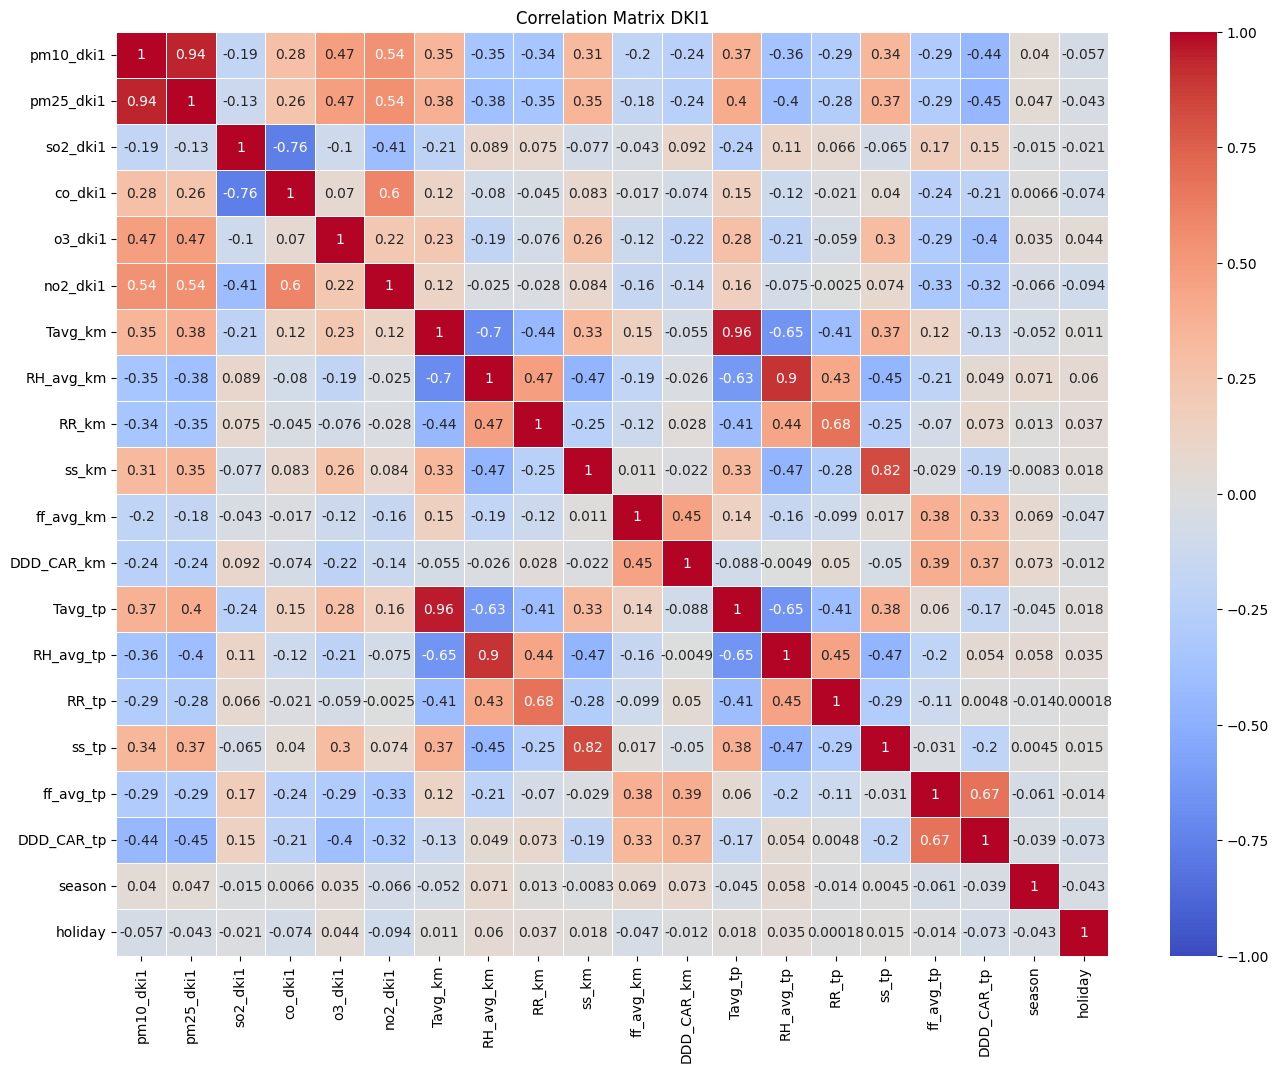

In [182]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_dki1.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix DKI1')
plt.show()

# tambah lib stats, func perason cpy.stats.pearsonr
# ambil p value (0-1) dan dijadiin heatmap
# cari p value < alpha (0.05)

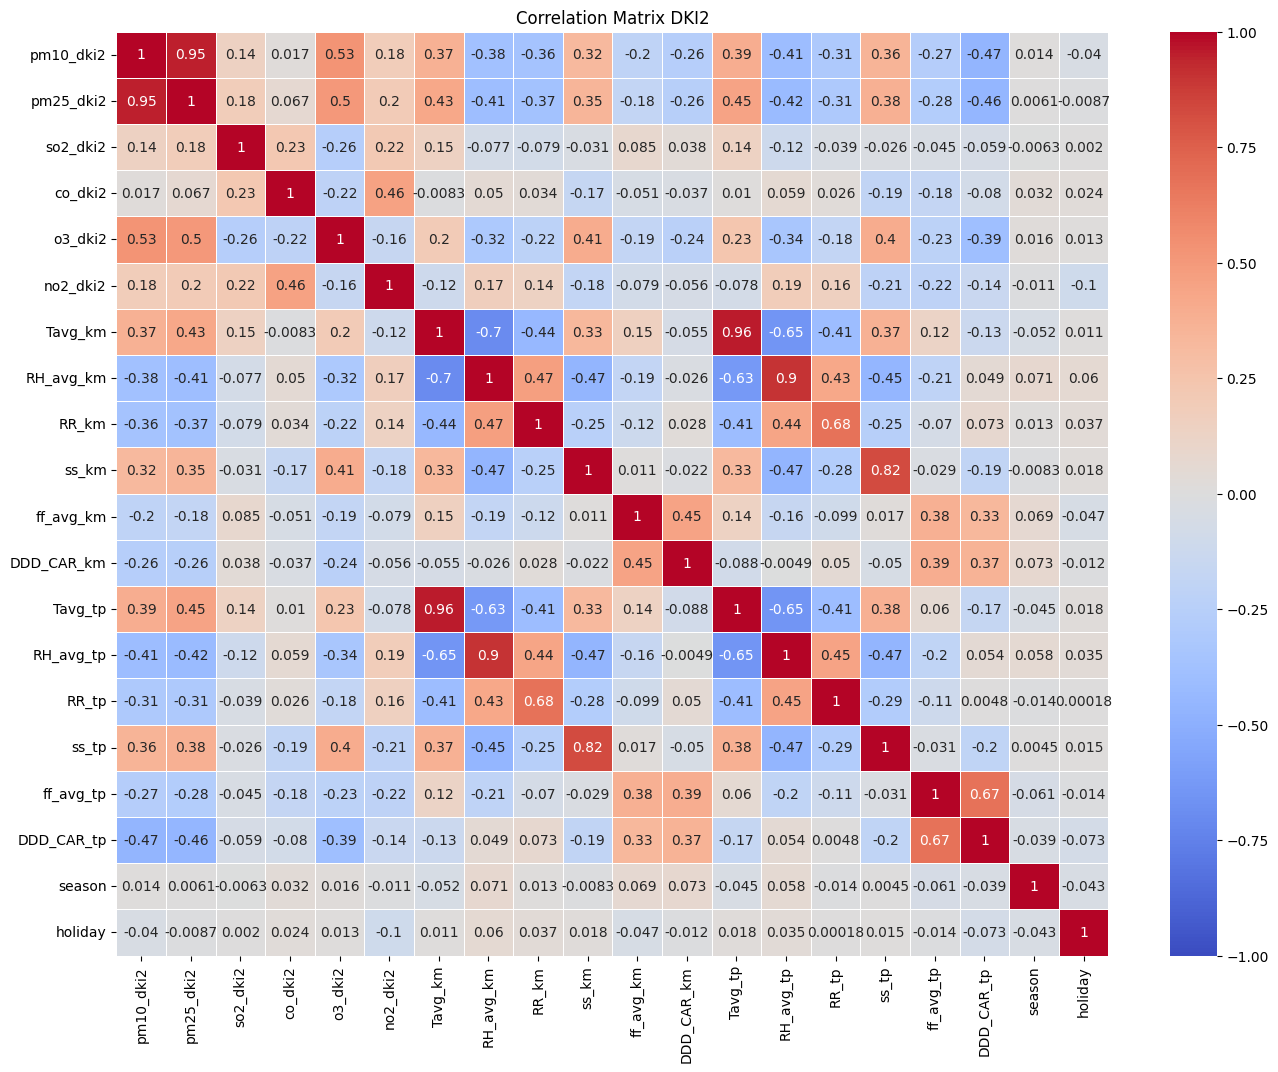

In [183]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_dki2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix DKI2')
plt.show()

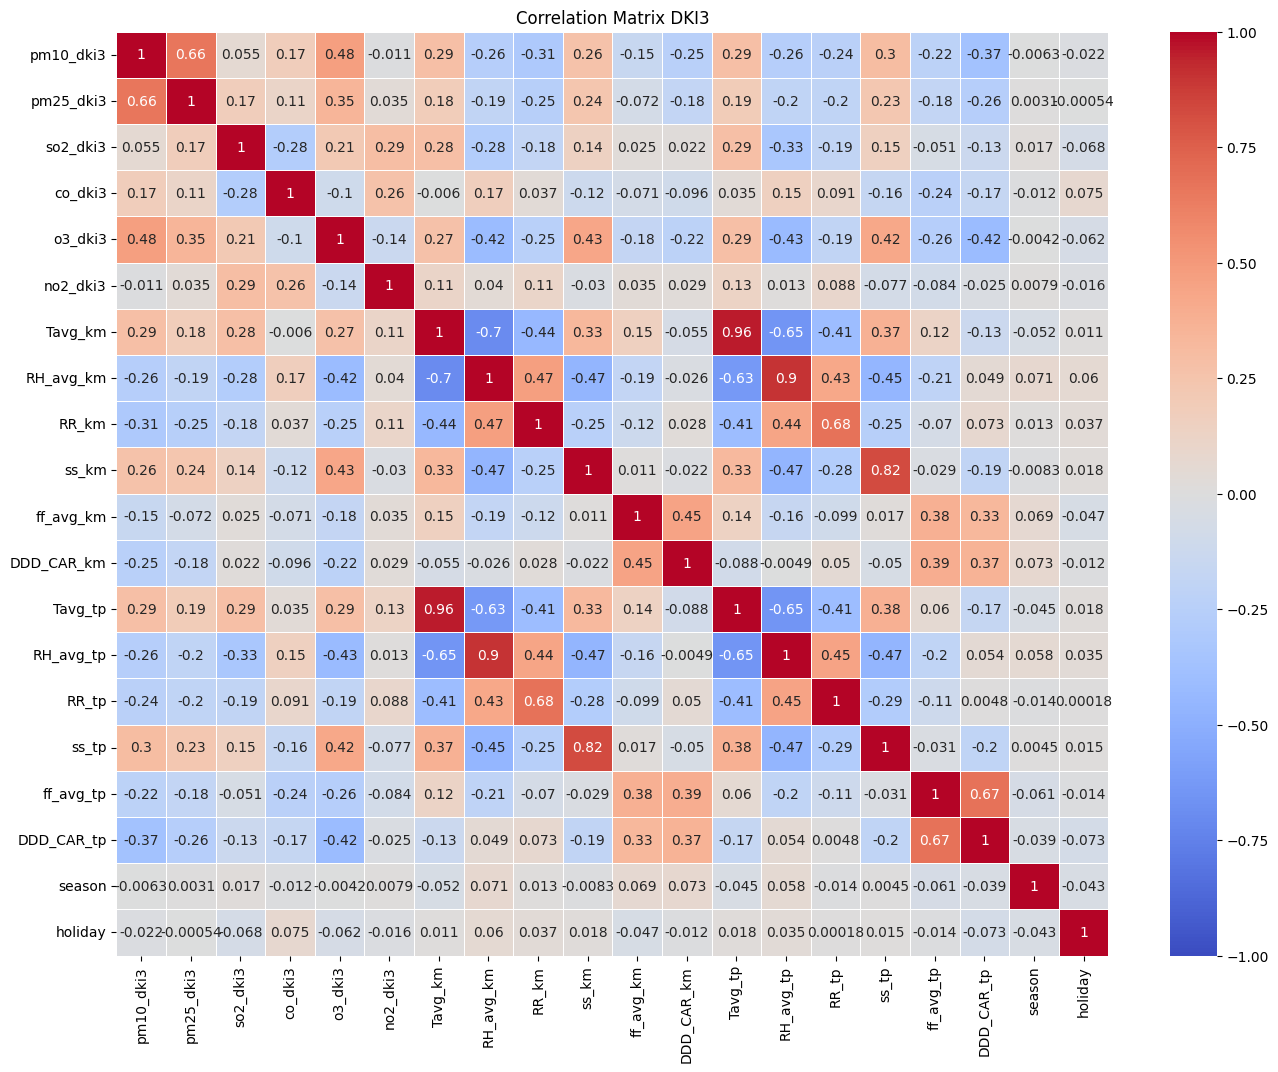

In [184]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_dki3.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix DKI3')
plt.show()

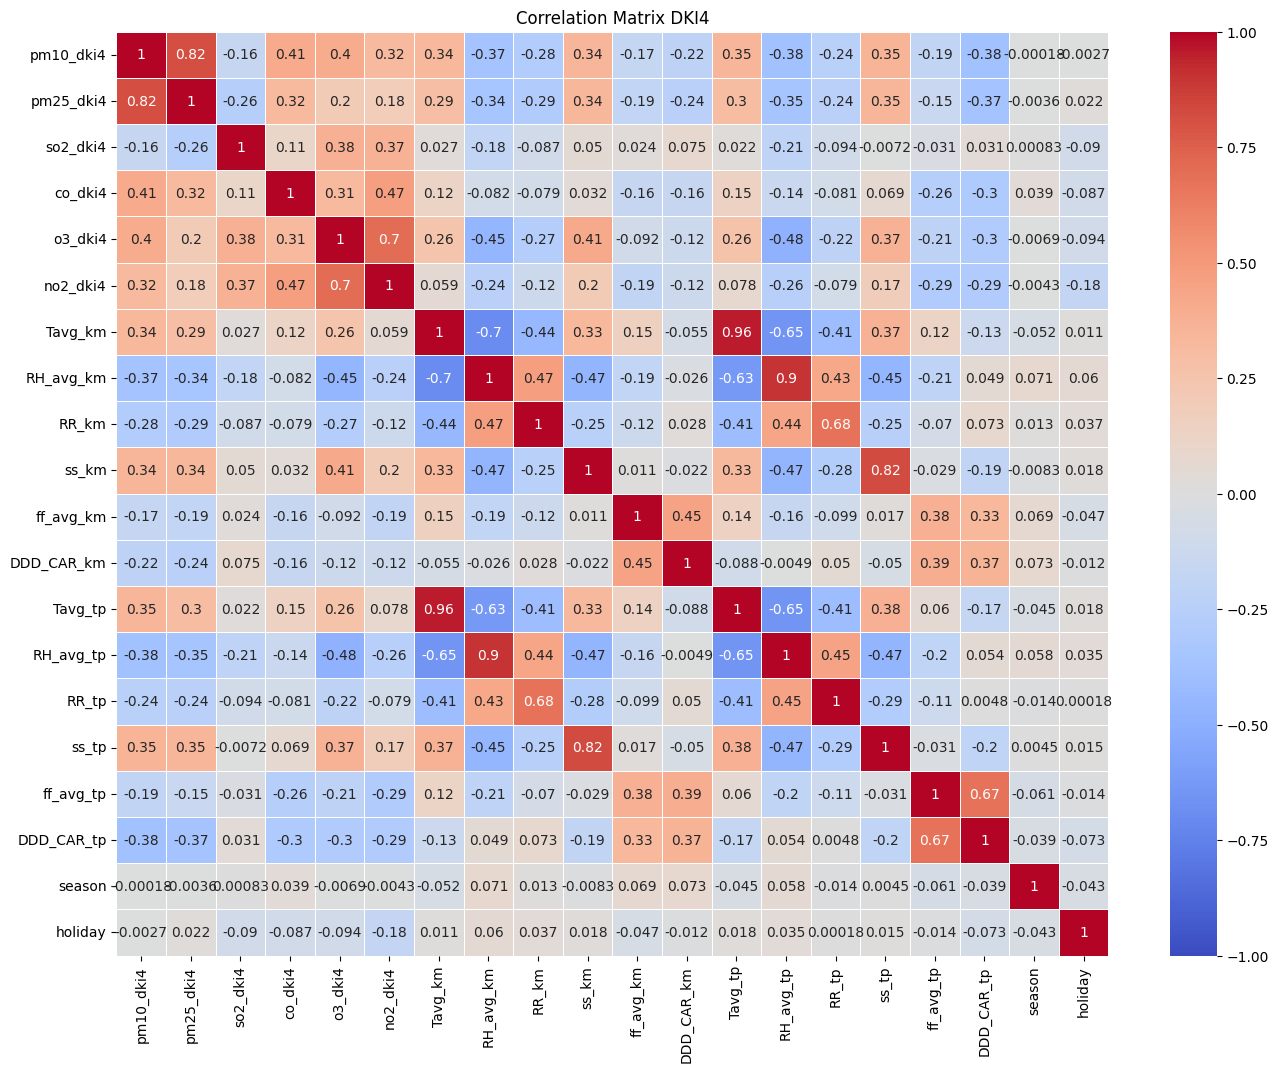

In [185]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_dki4.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix DKI4')
plt.show()

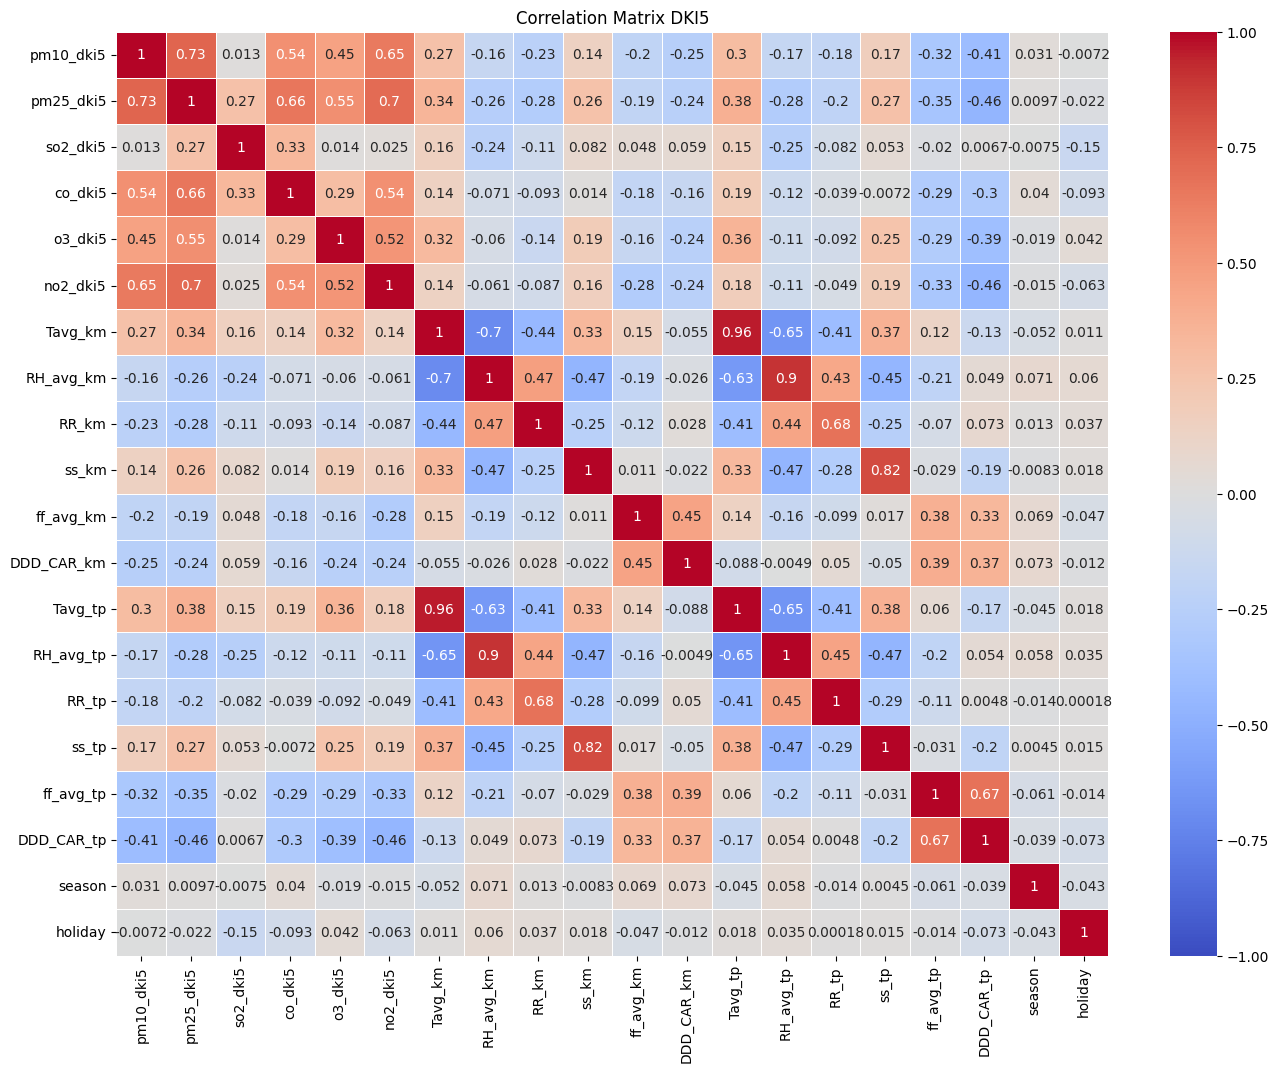

In [186]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset_dki5.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix DKI5')
plt.show()

# pilihan variable terhadap pm2.5
polusi (punya korelasi positif):
- pm10
- co
- o3
- no2

cuaca (punya korelasi negatifm, kecuali ss):
- Tavg
- RH
- RR
- ss (korelasi positif)